In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [2]:
for i in range(1,11):
    print(i)


1
2
3
4
5
6
7
8
9
10


In [3]:
class IMBALANCECIFAR10(torchvision.datasets.CIFAR10):
    cls_num = 10

    def __init__(self, root, imb_type='Zipf-Mandelbrot', imb_factor=2.3, imb_factor2=54.7, rand_number=0, train=True,
                 transform=None, target_transform=None,
                 download=False):
        super(IMBALANCECIFAR10, self).__init__(root, train, transform, target_transform, download)
        np.random.seed(rand_number)
        img_num_list = self.get_img_num_per_cls(self.cls_num, imb_type, imb_factor, imb_factor2)
        self.gen_imbalanced_data(img_num_list)

    def get_img_num_per_cls(self, cls_num, imb_type, imb_factor, imb_factor2):
        img_max = len(self.data) / cls_num
        img_num_per_cls = []
        if imb_type == 'exp':
            for cls_idx in range(cls_num):
                num = img_max * (imb_factor**(cls_idx / (cls_num - 1.0)))
                img_num_per_cls.append(int(num))
        if imb_type == 'Zipf-Mandelbrot':
            invC = 0
            for cls_idx in range(1, cls_num+1):
                invC += 1/((cls_idx+imb_factor2)**(imb_factor))
            for cls_idx in range(1, cls_num+1):
                num = img_max * (1/((cls_idx+imb_factor2)**(imb_factor)*invC))
                img_num_per_cls.append(int(num))
        if imb_type == 'Zipf':
            invC = 0
            for cls_idx in range(1, cls_num+1):
                invC += 1/((cls_idx)**(imb_factor))
            for cls_idx in range(1, cls_num+1):
                num = img_max * (1/((cls_idx)**(imb_factor)*invC))
                img_num_per_cls.append(int(num))
        elif imb_type == 'step':
            for cls_idx in range(cls_num // 2):
                img_num_per_cls.append(int(img_max))
            for cls_idx in range(cls_num // 2):
                img_num_per_cls.append(int(img_max * imb_factor))
        else:
            img_num_per_cls.extend([int(img_max)] * cls_num)
        return img_num_per_cls

    def gen_imbalanced_data(self, img_num_per_cls):
        new_data = []
        new_targets = []
        targets_np = np.array(self.targets, dtype=np.int64)
        classes = np.unique(targets_np)
        # np.random.shuffle(classes)
        self.num_per_cls_dict = dict()
        for the_class, the_img_num in zip(classes, img_num_per_cls):
            self.num_per_cls_dict[the_class] = the_img_num
            idx = np.where(targets_np == the_class)[0]
            np.random.shuffle(idx)
            selec_idx = idx[:the_img_num]
            new_data.append(self.data[selec_idx, ...])
            new_targets.extend([the_class, ] * the_img_num)
        new_data = np.vstack(new_data)
        self.data = new_data
        self.targets = new_targets
        
    def get_cls_num_list(self):
        cls_num_list = []
        for i in range(self.cls_num):
            cls_num_list.append(self.num_per_cls_dict[i])
        return cls_num_list

In [4]:
class IMBALANCECIFAR100(IMBALANCECIFAR10):
    """`CIFAR100 <https://www.cs.toronto.edu/~kriz/cifar.html>`_ Dataset.
    This is a subclass of the `CIFAR10` Dataset.
    """
    base_folder = 'cifar-100-python'
    url = "https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz"
    filename = "cifar-100-python.tar.gz"
    tgz_md5 = 'eb9058c3a382ffc7106e4002c42a8d85'
    train_list = [
        ['train', '16019d7e3df5f24257cddd939b257f8d'],
    ]

    test_list = [
        ['test', 'f0ef6b0ae62326f3e7ffdfab6717acfc'],
    ]
    meta = {
        'filename': 'meta',
        'key': 'fine_label_names',
        'md5': '7973b15100ade9c7d40fb424638fde48',
    }
    cls_num = 100


In [5]:
#CRéons des datasets en échantillonant sur les classes(especes)
if __name__ == '__main__':
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    trainset = IMBALANCECIFAR100(root='./data', train=True,
                    download=True, transform=transform)
    trainloader = iter(trainset)
    data, label = next(trainloader)
    import pdb; pdb.set_trace()

Files already downloaded and verified
--Return--
None
> c:\users\nilsr\appdata\local\temp\ipykernel_68740\3758276600.py(10)<cell line: 2>()

ipdb> c


In [6]:
import matplotlib.pyplot as plt

C:\Users\nilsr\AppData\Local\Temp\ipykernel_68740\106297698.py:8: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2318.)
  plt.imshow(img.squeeze().T, cmap="gray")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB 

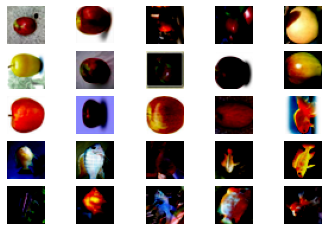

In [7]:
#Représentons graphiquement les premières images
figure = plt.figure()
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    img, label = trainset[i]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze().T, cmap="gray")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

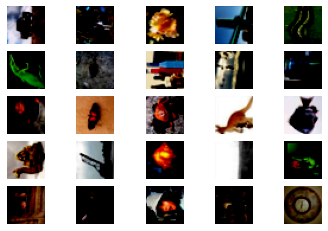

In [8]:
#Représentons graphiquement des images au hasard
figure = plt.figure()
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze().T, cmap="gray")
plt.show()

In [9]:
len(trainset)

447

In [10]:
trainset

Dataset IMBALANCECIFAR100
    Number of datapoints: 447
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [11]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [12]:
training_data = datasets.CIFAR100(
    root="./data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.CIFAR100(
    root="./data",
    train=False,
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
print(len(training_data))
print(len(test_data))

50000
10000


In [14]:
#Let's discover our CIFAR10 dataset
dataset_size = len(training_data)
training_data[1]

(tensor([[[1.0000, 0.9922, 0.9922,  ..., 0.9922, 0.9922, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 0.9922, 0.9922,  ..., 0.9922, 0.9922, 1.0000]],
 
         [[1.0000, 0.9922, 0.9922,  ..., 0.9922, 0.9922, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 0.9922, 0.9922,  ..., 0.9922, 0.9922, 1.0000]],
 
         [[1.0000, 0.9922, 0.9922,  ..., 0.9922, 0.9922, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

In [15]:
classes = training_data.classes
num_classes = len(training_data.classes)
print(classes)

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

In [16]:
img_dict = {}
for i in range(num_classes):
    img_dict[classes[i]] = 0
for i in range(dataset_size):
    img, label = training_data[i]
    img_dict[classes[label]] += 1
img_dict


{'apple': 500,
 'aquarium_fish': 500,
 'baby': 500,
 'bear': 500,
 'beaver': 500,
 'bed': 500,
 'bee': 500,
 'beetle': 500,
 'bicycle': 500,
 'bottle': 500,
 'bowl': 500,
 'boy': 500,
 'bridge': 500,
 'bus': 500,
 'butterfly': 500,
 'camel': 500,
 'can': 500,
 'castle': 500,
 'caterpillar': 500,
 'cattle': 500,
 'chair': 500,
 'chimpanzee': 500,
 'clock': 500,
 'cloud': 500,
 'cockroach': 500,
 'couch': 500,
 'crab': 500,
 'crocodile': 500,
 'cup': 500,
 'dinosaur': 500,
 'dolphin': 500,
 'elephant': 500,
 'flatfish': 500,
 'forest': 500,
 'fox': 500,
 'girl': 500,
 'hamster': 500,
 'house': 500,
 'kangaroo': 500,
 'keyboard': 500,
 'lamp': 500,
 'lawn_mower': 500,
 'leopard': 500,
 'lion': 500,
 'lizard': 500,
 'lobster': 500,
 'man': 500,
 'maple_tree': 500,
 'motorcycle': 500,
 'mountain': 500,
 'mouse': 500,
 'mushroom': 500,
 'oak_tree': 500,
 'orange': 500,
 'orchid': 500,
 'otter': 500,
 'palm_tree': 500,
 'pear': 500,
 'pickup_truck': 500,
 'pine_tree': 500,
 'plain': 500,
 'pl

In [17]:
classes_Especes_Zipf = trainset.classes
num_classes_Especes_Zipf = len(trainset.classes)
dataset_size_Especes_Zipf = len(trainset)
print(dataset_size_Especes_Zipf)

447


In [18]:
img_dict_Especes_Zipf = {}
for i in range(num_classes_Especes_Zipf):
    img_dict_Especes_Zipf[classes_Especes_Zipf[i]] = 0
for i in range(dataset_size_Especes_Zipf):
    img, label = trainset[i]
    img_dict_Especes_Zipf[classes_Especes_Zipf[label]] += 1
img_dict_Especes_Zipf


{'apple': 15,
 'aquarium_fish': 14,
 'baby': 14,
 'bear': 13,
 'beaver': 13,
 'bed': 12,
 'bee': 12,
 'beetle': 11,
 'bicycle': 11,
 'bottle': 11,
 'bowl': 10,
 'boy': 10,
 'bridge': 9,
 'bus': 9,
 'butterfly': 9,
 'camel': 9,
 'can': 8,
 'castle': 8,
 'caterpillar': 8,
 'cattle': 7,
 'chair': 7,
 'chimpanzee': 7,
 'clock': 7,
 'cloud': 7,
 'cockroach': 6,
 'couch': 6,
 'crab': 6,
 'crocodile': 6,
 'cup': 6,
 'dinosaur': 5,
 'dolphin': 5,
 'elephant': 5,
 'flatfish': 5,
 'forest': 5,
 'fox': 5,
 'girl': 5,
 'hamster': 4,
 'house': 4,
 'kangaroo': 4,
 'keyboard': 4,
 'lamp': 4,
 'lawn_mower': 4,
 'leopard': 4,
 'lion': 4,
 'lizard': 4,
 'lobster': 3,
 'man': 3,
 'maple_tree': 3,
 'motorcycle': 3,
 'mountain': 3,
 'mouse': 3,
 'mushroom': 3,
 'oak_tree': 3,
 'orange': 3,
 'orchid': 3,
 'otter': 3,
 'palm_tree': 3,
 'pear': 3,
 'pickup_truck': 3,
 'pine_tree': 2,
 'plain': 2,
 'plate': 2,
 'poppy': 2,
 'porcupine': 2,
 'possum': 2,
 'rabbit': 2,
 'raccoon': 2,
 'ray': 2,
 'road': 2,
 'roc

In [19]:
Liste = list(img_dict_Especes_Zipf.values())

In [20]:
Liste2 = []
for element in Liste:
    Liste2.append(element/sum(Liste))
Liste2

[0.03355704697986577,
 0.03131991051454139,
 0.03131991051454139,
 0.029082774049217,
 0.029082774049217,
 0.026845637583892617,
 0.026845637583892617,
 0.024608501118568233,
 0.024608501118568233,
 0.024608501118568233,
 0.02237136465324385,
 0.02237136465324385,
 0.020134228187919462,
 0.020134228187919462,
 0.020134228187919462,
 0.020134228187919462,
 0.017897091722595078,
 0.017897091722595078,
 0.017897091722595078,
 0.015659955257270694,
 0.015659955257270694,
 0.015659955257270694,
 0.015659955257270694,
 0.015659955257270694,
 0.013422818791946308,
 0.013422818791946308,
 0.013422818791946308,
 0.013422818791946308,
 0.013422818791946308,
 0.011185682326621925,
 0.011185682326621925,
 0.011185682326621925,
 0.011185682326621925,
 0.011185682326621925,
 0.011185682326621925,
 0.011185682326621925,
 0.008948545861297539,
 0.008948545861297539,
 0.008948545861297539,
 0.008948545861297539,
 0.008948545861297539,
 0.008948545861297539,
 0.008948545861297539,
 0.008948545861297539,

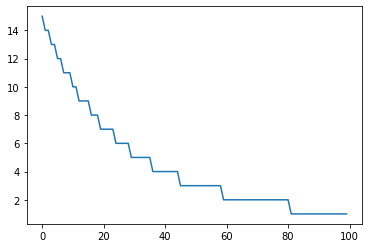

In [21]:
import matplotlib.pyplot as plt
plt.plot(Liste)

In [22]:
#Vérifions que notre dataset suit bien une loi de Zipf
import pandas as pd
df = pd.DataFrame(Liste)
df.columns = ['Images_Classes']
df.sort_values(by=['Images_Classes'], ascending=False, inplace=True)
print(df)

    Images_Classes
0               15
2               14
1               14
3               13
4               13
..             ...
84               1
83               1
82               1
81               1
99               1

[100 rows x 1 columns]


In [23]:
df.to_csv('C:/Users/nilsr/Desktop/PRE/Stage_M1/Jupyter_Notebook/Donnees_CSV/Dataset_Especes_ZM.csv', encoding='utf-8', index=False)

In [24]:
# Creons des datasets en échantillonant sur les méta-classes
import numpy as np
from torchvision.datasets import CIFAR100


class CIFAR100Coarse(CIFAR100):
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        super(CIFAR100Coarse, self).__init__(root, train, transform, target_transform, download)

        # update labels
        coarse_labels = np.array([ 4,  1, 14,  8,  0,  6,  7,  7, 18,  3,
                                   3, 14,  9, 18,  7, 11,  3,  9,  7, 11,
                                   6, 11,  5, 10,  7,  6, 13, 15,  3, 15, 
                                   0, 11,  1, 10, 12, 14, 16,  9, 11,  5,
                                   5, 19,  8,  8, 15, 13, 14, 17, 18, 10,
                                   16, 4, 17,  4,  2,  0, 17,  4, 18, 17,
                                   10, 3,  2, 12, 12, 16, 12,  1,  9, 19, 
                                   2, 10,  0,  1, 16, 12,  9, 13, 15, 13,
                                  16, 19,  2,  4,  6, 19,  5,  5,  8, 19,
                                  18,  1,  2, 15,  6,  0, 17,  8, 14, 13])
        self.targets = coarse_labels[self.targets]

        # update classes
        self.classes = [['beaver', 'dolphin', 'otter', 'seal', 'whale'],
                        ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
                        ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
                        ['bottle', 'bowl', 'can', 'cup', 'plate'],
                        ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
                        ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
                        ['bed', 'chair', 'couch', 'table', 'wardrobe'],
                        ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
                        ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
                        ['bridge', 'castle', 'house', 'road', 'skyscraper'],
                        ['cloud', 'forest', 'mountain', 'plain', 'sea'],
                        ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
                        ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
                        ['crab', 'lobster', 'snail', 'spider', 'worm'],
                        ['baby', 'boy', 'girl', 'man', 'woman'],
                        ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
                        ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
                        ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
                        ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
                        ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']]

In [25]:
class IMBALANCECIFAR100Metaclasses(CIFAR100Coarse):
    cls_num = 100

    def __init__(self, root, imb_type='Zipf-Mandelbrot', imb_factor=15, imb_factor2=92, rand_number=0, train=True,
                 transform=None, target_transform=None,
                 download=False):
        super(IMBALANCECIFAR100Metaclasses, self).__init__(root, train, transform, target_transform, download)
        np.random.seed(rand_number)
        img_num_list = self.get_img_num_per_cls(self.cls_num, imb_type, imb_factor, imb_factor2)
        self.gen_imbalanced_data(img_num_list)

    def get_img_num_per_cls(self, cls_num, imb_type, imb_factor, imb_factor2):
        img_max = len(self.data) / cls_num
        img_num_per_cls = []
        if imb_type == 'exp':
            for cls_idx in range(cls_num):
                num = img_max * (imb_factor**(cls_idx / (cls_num - 1.0)))
                img_num_per_cls.append(int(num))
        if imb_type == 'Zipf-Mandelbrot':
            invC = 0
            for cls_idx in range(1, cls_num+1):
                invC += 1/((cls_idx+imb_factor2)**(imb_factor))
            for cls_idx in range(1, cls_num+1):
                num = img_max * (1/((cls_idx+imb_factor2)**(imb_factor)*invC))
                img_num_per_cls.append(int(num))
        if imb_type == 'Zipf':
            invC = 0
            for cls_idx in range(1, cls_num+1):
                invC += 1/((cls_idx)**(imb_factor))
            for cls_idx in range(1, cls_num+1):
                num = img_max * (1/((cls_idx)**(imb_factor)*invC))
                img_num_per_cls.append(int(num))
        elif imb_type == 'step':
            for cls_idx in range(cls_num // 2):
                img_num_per_cls.append(int(img_max))
            for cls_idx in range(cls_num // 2):
                img_num_per_cls.append(int(img_max * imb_factor))
        else:
            img_num_per_cls.extend([int(img_max)] * cls_num)
        return img_num_per_cls

    def gen_imbalanced_data(self, img_num_per_cls):
        new_data = []
        new_targets = []
        targets_np = np.array(self.targets, dtype=np.int64)
        classes = np.unique(targets_np)
        # np.random.shuffle(classes)
        self.num_per_cls_dict = dict()
        for the_class, the_img_num in zip(classes, img_num_per_cls):
            self.num_per_cls_dict[the_class] = the_img_num
            idx = np.where(targets_np == the_class)[0]
            np.random.shuffle(idx)
            selec_idx = idx[:the_img_num]
            new_data.append(self.data[selec_idx, ...])
            new_targets.extend([the_class, ] * the_img_num)
        new_data = np.vstack(new_data)
        self.data = new_data
        self.targets = new_targets
        
    def get_cls_num_list(self):
        cls_num_list = []
        for i in range(self.cls_num):
            cls_num_list.append(self.num_per_cls_dict[i])
        return cls_num_list

In [26]:
dataset = CIFAR100Coarse(
    root="./data",
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified


In [27]:
dataset2 = IMBALANCECIFAR100Metaclasses(
    root="./data",
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified


In [28]:
print(len(dataset.classes))
print(dataset.classes)
print(len(dataset))

20
[['beaver', 'dolphin', 'otter', 'seal', 'whale'], ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'], ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'], ['bottle', 'bowl', 'can', 'cup', 'plate'], ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'], ['clock', 'keyboard', 'lamp', 'telephone', 'television'], ['bed', 'chair', 'couch', 'table', 'wardrobe'], ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'], ['bear', 'leopard', 'lion', 'tiger', 'wolf'], ['bridge', 'castle', 'house', 'road', 'skyscraper'], ['cloud', 'forest', 'mountain', 'plain', 'sea'], ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'], ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'], ['crab', 'lobster', 'snail', 'spider', 'worm'], ['baby', 'boy', 'girl', 'man', 'woman'], ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'], ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'], ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'], ['bicycle', 'bus', 'motorcycle', 'pickup_truck',

In [29]:
classes3 = dataset.classes
num_classes3 = len(dataset.classes)
dataset_size3 = len(dataset)
print(dataset_size3)
print(num_classes3)
print(classes3)

50000
20
[['beaver', 'dolphin', 'otter', 'seal', 'whale'], ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'], ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'], ['bottle', 'bowl', 'can', 'cup', 'plate'], ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'], ['clock', 'keyboard', 'lamp', 'telephone', 'television'], ['bed', 'chair', 'couch', 'table', 'wardrobe'], ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'], ['bear', 'leopard', 'lion', 'tiger', 'wolf'], ['bridge', 'castle', 'house', 'road', 'skyscraper'], ['cloud', 'forest', 'mountain', 'plain', 'sea'], ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'], ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'], ['crab', 'lobster', 'snail', 'spider', 'worm'], ['baby', 'boy', 'girl', 'man', 'woman'], ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'], ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'], ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'], ['bicycle', 'bus', 'motorcycle', 'pickup_t

In [30]:
MetaClasses = ['Fish1', 'Fish2', 'Flowers', 'Kitchen', 'Fruits', 'Technology', 'Furniture', 'Insects', 'Jungle', 'Buildings', 'Nature', 'Desert', 'Forest', 'Sea', 'Gender', 'Savage', 'Domestic', 'Trees', 'Vehicles', 'Big_Vehicles']

In [31]:
classes3[0]

['beaver', 'dolphin', 'otter', 'seal', 'whale']

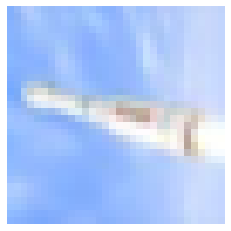

In [32]:
figure = plt.figure()
img, label = dataset[199]
plt.axis("off")
plt.imshow(img.squeeze().T, cmap="gray")
plt.show()

In [33]:
img_dict3 = {}
for i in range(num_classes3):
    img_dict3[MetaClasses[i]] = 0
for i in range(dataset_size3):
    img, label = dataset[i]
    img_dict3[MetaClasses[label]] += 1
img_dict3

{'Fish1': 2500,
 'Fish2': 2500,
 'Flowers': 2500,
 'Kitchen': 2500,
 'Fruits': 2500,
 'Technology': 2500,
 'Furniture': 2500,
 'Insects': 2500,
 'Jungle': 2500,
 'Buildings': 2500,
 'Nature': 2500,
 'Desert': 2500,
 'Forest': 2500,
 'Sea': 2500,
 'Gender': 2500,
 'Savage': 2500,
 'Domestic': 2500,
 'Trees': 2500,
 'Vehicles': 2500,
 'Big_Vehicles': 2500}

In [34]:
classes4 = dataset2.classes
num_classes4 = len(dataset2.classes)
dataset_size4 = len(dataset2)
print(dataset_size4)
print(num_classes4)
print(classes4)

458
20
[['beaver', 'dolphin', 'otter', 'seal', 'whale'], ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'], ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'], ['bottle', 'bowl', 'can', 'cup', 'plate'], ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'], ['clock', 'keyboard', 'lamp', 'telephone', 'television'], ['bed', 'chair', 'couch', 'table', 'wardrobe'], ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'], ['bear', 'leopard', 'lion', 'tiger', 'wolf'], ['bridge', 'castle', 'house', 'road', 'skyscraper'], ['cloud', 'forest', 'mountain', 'plain', 'sea'], ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'], ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'], ['crab', 'lobster', 'snail', 'spider', 'worm'], ['baby', 'boy', 'girl', 'man', 'woman'], ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'], ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'], ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'], ['bicycle', 'bus', 'motorcycle', 'pickup_tru

1


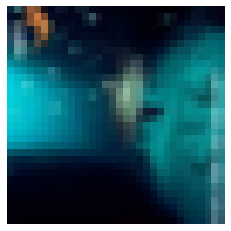

1


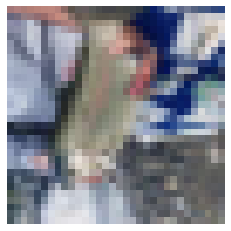

1


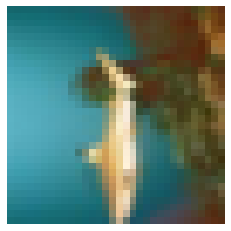

1


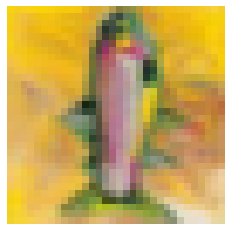

1


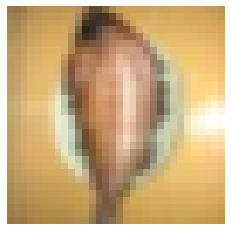

1


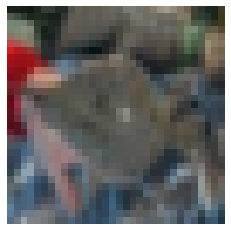

1


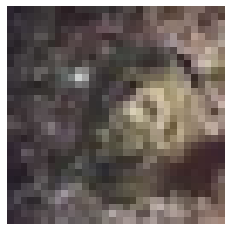

1


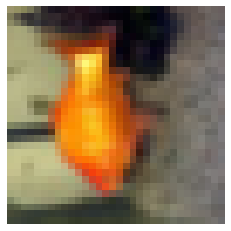

1


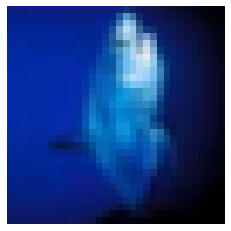

1


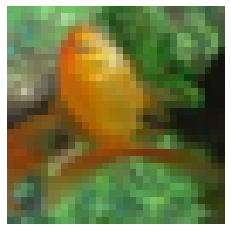

1


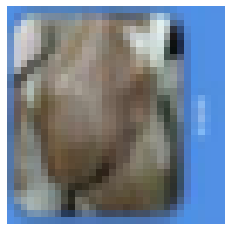

1


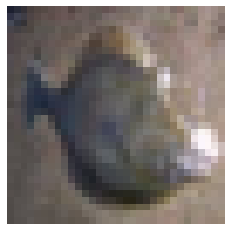

1


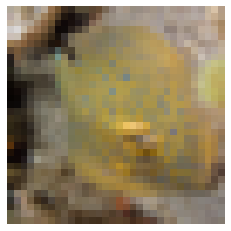

1


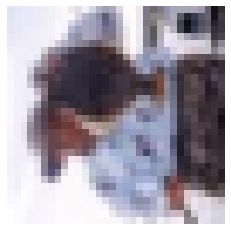

1


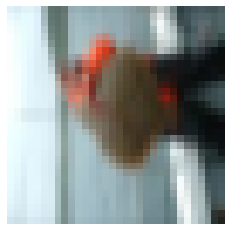

1


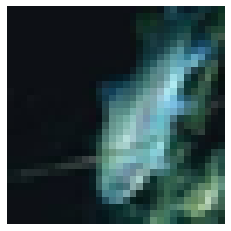

1


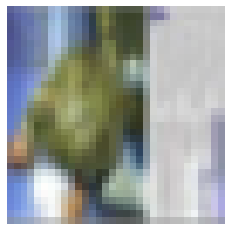

1


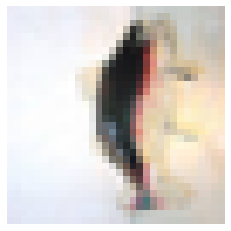

1


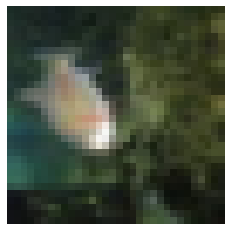

1


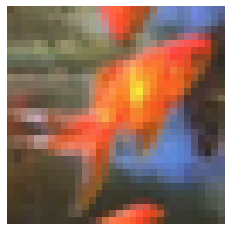

1


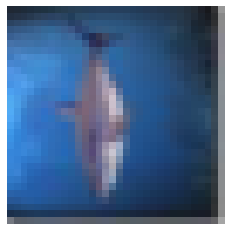

1


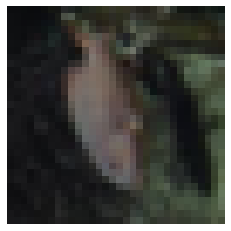

1


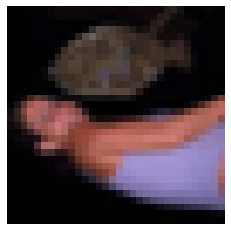

1


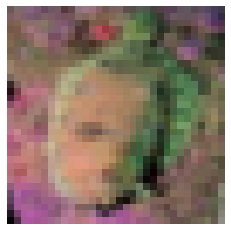

1


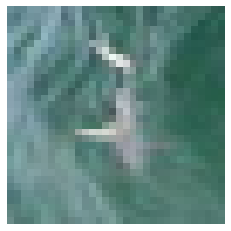

1


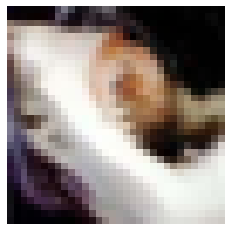

1


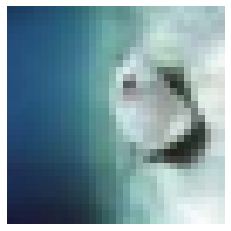

1


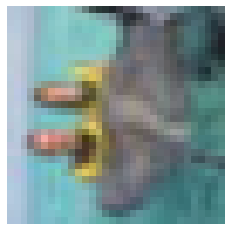

1


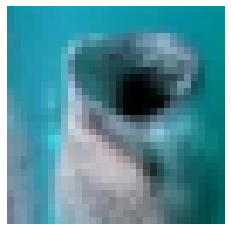

1


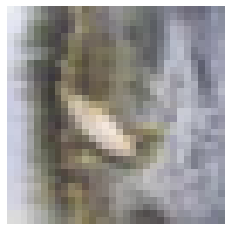

1


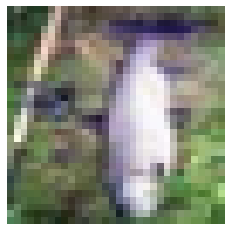

1


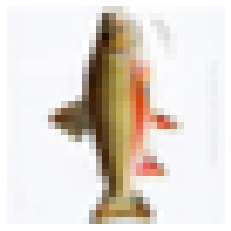

1


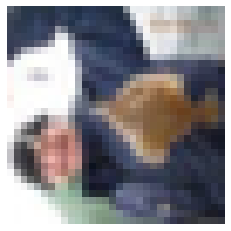

1


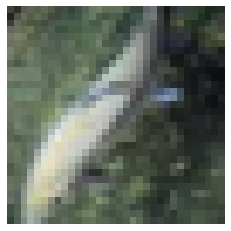

1


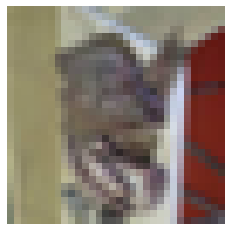

1


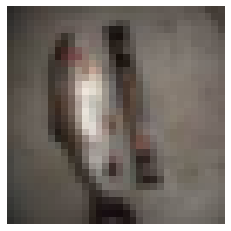

1


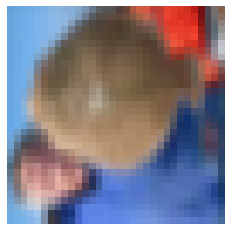

1


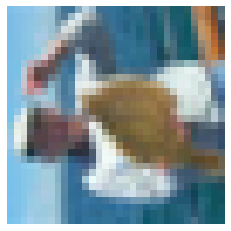

1


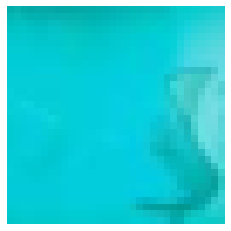

1


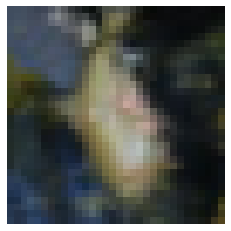

1


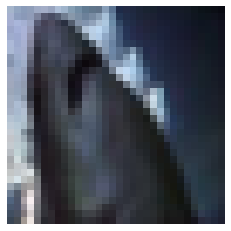

1


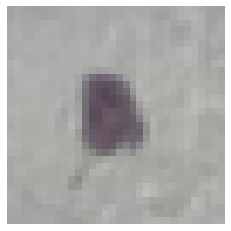

1


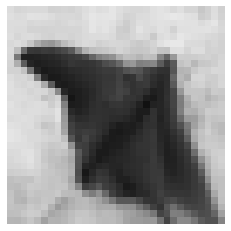

1


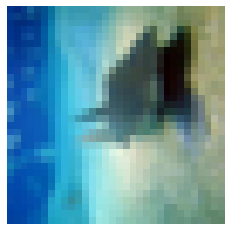

1


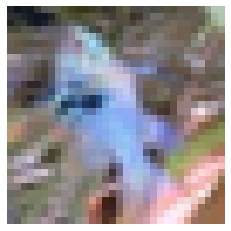

1


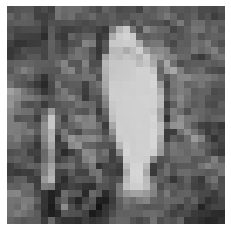

1


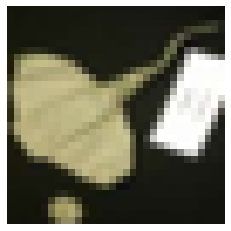

1


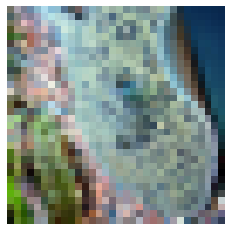

1


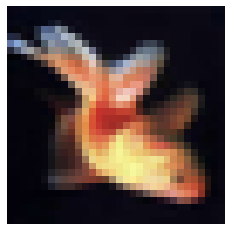

1


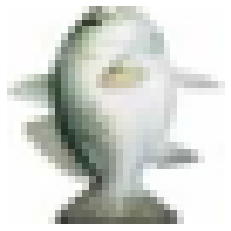

1


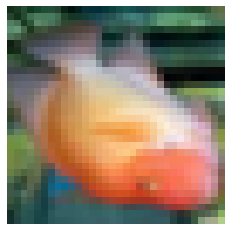

1


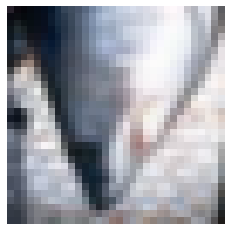

1


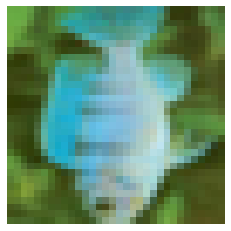

1


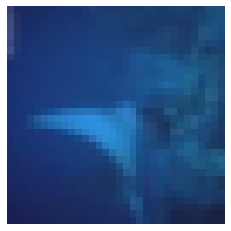

1


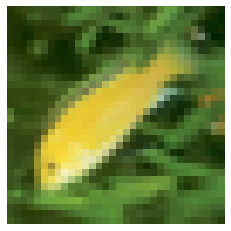

1


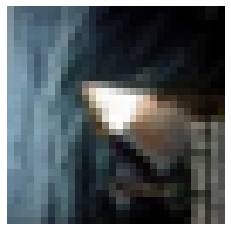

1


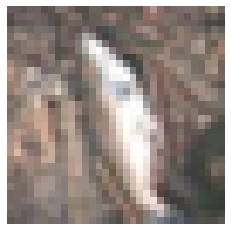

1


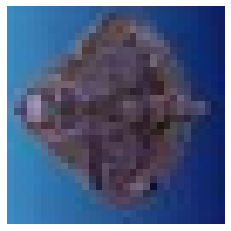

1


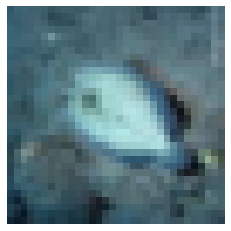

2


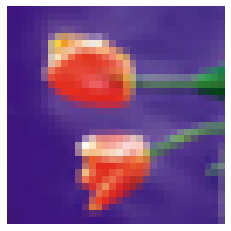

2


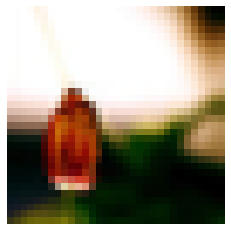

In [35]:
for i in range(69, 130):
    figure = plt.figure()
    img, label = dataset2[i]
    print(label)
    plt.axis("off")
    plt.imshow(img.squeeze().T, cmap="gray")
    plt.show()

In [36]:
img_dict4 = {}
for i in range(num_classes4):
    img_dict4[MetaClasses[i]] = 0
for i in range(dataset_size4):
    img, label = dataset2[i]
    img_dict4[MetaClasses[label]] += 1
img_dict4

{'Fish1': 69,
 'Fish2': 59,
 'Flowers': 50,
 'Kitchen': 43,
 'Fruits': 37,
 'Technology': 31,
 'Furniture': 27,
 'Insects': 23,
 'Jungle': 20,
 'Buildings': 17,
 'Nature': 15,
 'Desert': 13,
 'Forest': 11,
 'Sea': 9,
 'Gender': 8,
 'Savage': 7,
 'Domestic': 6,
 'Trees': 5,
 'Vehicles': 4,
 'Big_Vehicles': 4}

In [37]:
Liste3 = list(img_dict4.values())

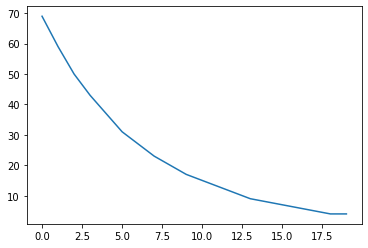

In [38]:
plt.plot(Liste3)

In [39]:
#Let's apply Joly's method with the joint species/genera couple
Genres = []
All = []
q1, a1 = 10, 4
q2, a2 = 2, 2
N_images = 10000
for i in range(1, 21): #Les genres
    Int = []
    for j in range(1, 6): #les especes
        element = (1/(i+q1)**(a1))*(1/(j+q2)**(a2))
        Int.append(element)
    print(Int)
    Genres.append(Int)
    All.extend(Int)
    
    
        
        

[7.589038392945229e-06, 4.2688340960316914e-06, 2.7320538214602825e-06, 1.8972595982363072e-06, 1.3939050109491236e-06]
[5.358367626886145e-06, 3.0140817901234566e-06, 1.9290123456790124e-06, 1.3395919067215363e-06, 9.841899722852103e-07]
[3.89030885161973e-06, 2.1882987290360982e-06, 1.4005111865831029e-06, 9.725772129049325e-07, 7.145465237668891e-07]
[2.89231338794021e-06, 1.6269262807163682e-06, 1.0412328196584756e-06, 7.230783469850525e-07, 5.312412345196304e-07]
[2.194787379972565e-06, 1.234567901234568e-06, 7.901234567901235e-07, 5.486968449931413e-07, 4.0312421264802214e-07]
[1.6954210069444444e-06, 9.5367431640625e-07, 6.103515625e-07, 4.238552517361111e-07, 3.114038584183673e-07]
[1.3303374134781805e-06, 7.483147950814765e-07, 4.789214688521449e-07, 3.325843533695451e-07, 2.4434768818986987e-07]
[1.0584429880268929e-06, 5.953741807651273e-07, 3.8103947568968147e-07, 2.646107470067232e-07, 1.9440789576004154e-07]
[8.525955994130732e-07, 4.795850246698537e-07, 3.069344157887063

In [40]:
Genres

[[7.589038392945229e-06,
  4.2688340960316914e-06,
  2.7320538214602825e-06,
  1.8972595982363072e-06,
  1.3939050109491236e-06],
 [5.358367626886145e-06,
  3.0140817901234566e-06,
  1.9290123456790124e-06,
  1.3395919067215363e-06,
  9.841899722852103e-07],
 [3.89030885161973e-06,
  2.1882987290360982e-06,
  1.4005111865831029e-06,
  9.725772129049325e-07,
  7.145465237668891e-07],
 [2.89231338794021e-06,
  1.6269262807163682e-06,
  1.0412328196584756e-06,
  7.230783469850525e-07,
  5.312412345196304e-07],
 [2.194787379972565e-06,
  1.234567901234568e-06,
  7.901234567901235e-07,
  5.486968449931413e-07,
  4.0312421264802214e-07],
 [1.6954210069444444e-06,
  9.5367431640625e-07,
  6.103515625e-07,
  4.238552517361111e-07,
  3.114038584183673e-07],
 [1.3303374134781805e-06,
  7.483147950814765e-07,
  4.789214688521449e-07,
  3.325843533695451e-07,
  2.4434768818986987e-07],
 [1.0584429880268929e-06,
  5.953741807651273e-07,
  3.8103947568968147e-07,
  2.646107470067232e-07,
  1.9440789

In [41]:
All

[7.589038392945229e-06,
 4.2688340960316914e-06,
 2.7320538214602825e-06,
 1.8972595982363072e-06,
 1.3939050109491236e-06,
 5.358367626886145e-06,
 3.0140817901234566e-06,
 1.9290123456790124e-06,
 1.3395919067215363e-06,
 9.841899722852103e-07,
 3.89030885161973e-06,
 2.1882987290360982e-06,
 1.4005111865831029e-06,
 9.725772129049325e-07,
 7.145465237668891e-07,
 2.89231338794021e-06,
 1.6269262807163682e-06,
 1.0412328196584756e-06,
 7.230783469850525e-07,
 5.312412345196304e-07,
 2.194787379972565e-06,
 1.234567901234568e-06,
 7.901234567901235e-07,
 5.486968449931413e-07,
 4.0312421264802214e-07,
 1.6954210069444444e-06,
 9.5367431640625e-07,
 6.103515625e-07,
 4.238552517361111e-07,
 3.114038584183673e-07,
 1.3303374134781805e-06,
 7.483147950814765e-07,
 4.789214688521449e-07,
 3.325843533695451e-07,
 2.4434768818986987e-07,
 1.0584429880268929e-06,
 5.953741807651273e-07,
 3.8103947568968147e-07,
 2.646107470067232e-07,
 1.9440789576004154e-07,
 8.525955994130732e-07,
 4.79585

In [42]:
a = sum(All)
a

7.197013346795171e-05

In [43]:
for i in range(len(All)):
    All[i] = All[i]*N_images/a
All

[1054.4705181524537,
 593.1396664607552,
 379.60938653488336,
 263.6176295381134,
 193.67825843616492,
 744.5265652136417,
 418.7961929326735,
 268.029563476911,
 186.13164130341042,
 136.74977728413828,
 540.5448988575356,
 304.0565056073638,
 194.59616358871284,
 135.1362247143839,
 99.28375693301673,
 401.876896508488,
 226.05575428602452,
 144.6756827430557,
 100.469224127122,
 73.8141238484978,
 304.9580811115076,
 171.53892062522306,
 109.78490920014276,
 76.2395202778769,
 56.012708775583036,
 235.57285852462883,
 132.50973292010372,
 84.80622906886639,
 58.89321463115721,
 43.26848421880938,
 184.84576162007252,
 103.97574091129079,
 66.54447418322609,
 46.21144040501813,
 33.95126233838066,
 147.06697584466997,
 82.72517391262686,
 52.9441113040812,
 36.76674396116749,
 27.01230168575571,
 118.46519637103826,
 66.63667295870901,
 42.64747069357377,
 29.616299092759565,
 21.75891361917029,
 96.49064285168798,
 54.27598660407448,
 34.73663142660768,
 24.122660712921995,
 17.7227

In [44]:
for element in Genres:
    for i in range(len(element)):
            element[i] = element[i]*N_images/a
Genres


[[1054.4705181524537,
  593.1396664607552,
  379.60938653488336,
  263.6176295381134,
  193.67825843616492],
 [744.5265652136417,
  418.7961929326735,
  268.029563476911,
  186.13164130341042,
  136.74977728413828],
 [540.5448988575356,
  304.0565056073638,
  194.59616358871284,
  135.1362247143839,
  99.28375693301673],
 [401.876896508488,
  226.05575428602452,
  144.6756827430557,
  100.469224127122,
  73.8141238484978],
 [304.9580811115076,
  171.53892062522306,
  109.78490920014276,
  76.2395202778769,
  56.012708775583036],
 [235.57285852462883,
  132.50973292010372,
  84.80622906886639,
  58.89321463115721,
  43.26848421880938],
 [184.84576162007252,
  103.97574091129079,
  66.54447418322609,
  46.21144040501813,
  33.95126233838066],
 [147.06697584466997,
  82.72517391262686,
  52.9441113040812,
  36.76674396116749,
  27.01230168575571],
 [118.46519637103826,
  66.63667295870901,
  42.64747069357377,
  29.616299092759565,
  21.75891361917029],
 [96.49064285168798,
  54.275986604

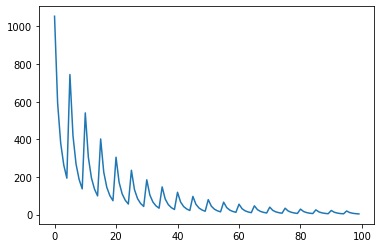

In [45]:
#Représentons graphiquement les trois courbes de Joly
plt.plot(All)

In [46]:
All2 = All.copy()

In [47]:
All2.sort(reverse=True)
All2

[1054.4705181524537,
 744.5265652136417,
 593.1396664607552,
 540.5448988575356,
 418.7961929326735,
 401.876896508488,
 379.60938653488336,
 304.9580811115076,
 304.0565056073638,
 268.029563476911,
 263.6176295381134,
 235.57285852462883,
 226.05575428602452,
 194.59616358871284,
 193.67825843616492,
 186.13164130341042,
 184.84576162007252,
 171.53892062522306,
 147.06697584466997,
 144.6756827430557,
 136.74977728413828,
 135.1362247143839,
 132.50973292010372,
 118.46519637103826,
 109.78490920014276,
 103.97574091129079,
 100.469224127122,
 99.28375693301673,
 96.49064285168798,
 84.80622906886639,
 82.72517391262686,
 79.3830906683433,
 76.2395202778769,
 73.8141238484978,
 66.63667295870901,
 66.54447418322609,
 65.90440738452835,
 58.89321463115721,
 56.012708775583036,
 55.168838219810794,
 54.27598660407448,
 52.9441113040812,
 46.532910325852605,
 46.21144040501813,
 44.65298850094311,
 43.26848421880938,
 42.64747069357377,
 39.522567312051386,
 37.0712291537972,
 36.76674

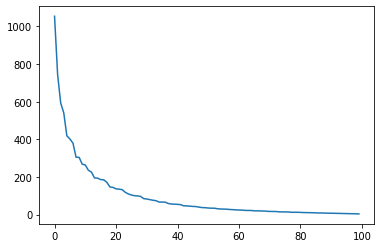

In [48]:
plt.plot(All2)

In [49]:
import math as m
All3 = []
for element in All2:
    All3.append(m.log(element))
All3

[6.960794041398504,
 6.612748533439985,
 6.3854298964949425,
 6.29257770274584,
 6.037384388536424,
 5.996145814130952,
 5.939142793866523,
 5.7201743281831465,
 5.717213557842278,
 5.5910972859080035,
 5.574499680278613,
 5.462020243632861,
 5.420781669227391,
 5.270926455213858,
 5.266198320624097,
 5.226454172320095,
 5.219521756367122,
 5.144810183279584,
 4.990888101007328,
 4.97449456659897,
 4.9181528126655785,
 4.906283341625949,
 4.8866560987293,
 4.774619215926225,
 4.698523080651165,
 4.6441576114635605,
 4.6098514530110615,
 4.597981981971432,
 4.5694460383760225,
 4.44036899610088,
 4.415523956103766,
 4.374285381698295,
 4.333879967063256,
 4.301550093356545,
 4.199255071022663,
 4.19787050883514,
 4.188205319158723,
 4.075725882512971,
 4.025578607408739,
 4.010398268875387,
 3.994081893472461,
 3.9692368534753464,
 3.840159811200204,
 3.8332273952472318,
 3.7989212367947327,
 3.7674245228584544,
 3.7529679683942434,
 3.676871833119183,
 3.6128411742551614,
 3.6045937398

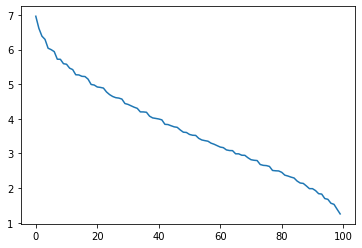

In [50]:
plt.plot(All3)

In [51]:
#Echantillons de manière réaliste à la Joly
class CIFAR100Nils(CIFAR100):
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        super(CIFAR100Nils, self).__init__(root, train, transform, target_transform, download)

        # update labels
        coarse_labels = np.array([ 20,  5, 70,  40,  0,  30,  35,  36, 90,  15,
                                   16, 71,  45, 91, 37, 55,  17,  46,  38, 56,
                                   31, 57,  25, 50,  39,  32, 65, 75,  18, 76, 
                                   1, 58,  6, 51, 60, 72, 80, 47, 59, 26,
                                   27, 95,  41,  42, 77, 66, 73, 85, 92, 52,
                                   81, 21, 86,  22,  10,  2, 87,  23, 93, 88,
                                   53, 19,  11, 61, 62, 82, 63,  7,  48, 96, 
                                   12, 54,  3,  8, 83, 64,  49, 67, 78, 68,
                                  84, 97,  13,  24,  33, 98,  28,  29,  43, 99,
                                  94,  9,  14, 79,  34,  4, 89,  44, 74, 69])
        self.targets = coarse_labels[self.targets]

        # update classes
        self.classes = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
                        'aquarium_fish', 'flatfish', 'ray', 'shark', 'trout',
                        'orchid', 'poppy', 'rose', 'sunflower', 'tulip',
                        'bottle', 'bowl', 'can', 'cup', 'plate',
                        'apple', 'mushroom', 'orange', 'pear', 'sweet_pepper',
                        'clock', 'keyboard', 'lamp', 'telephone', 'television',
                        'bed', 'chair', 'couch', 'table', 'wardrobe',
                        'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
                        'bear', 'leopard', 'lion', 'tiger', 'wolf',
                        'bridge', 'castle', 'house', 'road', 'skyscraper',
                        'cloud', 'forest', 'mountain', 'plain', 'sea',
                        'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
                        'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
                        'crab', 'lobster', 'snail', 'spider', 'worm',
                        'baby', 'boy', 'girl', 'man', 'woman',
                        'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
                        'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
                        'maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree',
                        'bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train',
                        'lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']

In [52]:
class IMBALANCECIFAR100Realist(CIFAR100Nils):
    cls_num = 100

    def __init__(self, root, imb_type='ZM', a1=4, q1=10, a2 = 2, q2=2, rand_number=0, train=True,
                 transform=None, target_transform=None,
                 download=False):
        super(IMBALANCECIFAR100Realist, self).__init__(root, train, transform, target_transform, download)
        np.random.seed(rand_number)
        img_num_list = self.get_img_num_per_cls(self.cls_num, imb_type, a1, q1, a2, q2)
        self.gen_imbalanced_data(img_num_list)

    def get_img_num_per_cls(self, cls_num, imb_type, a1, q1, a2, q2):
        img_max = len(self.data) / cls_num
        img_num_per_cls = []
        if imb_type == 'exp':
            for cls_idx in range(cls_num):
                num = img_max * (imb_factor**(cls_idx / (cls_num - 1.0)))
                img_num_per_cls.append(int(num))
        if imb_type == 'ZM':
            Normalisation = 0
            for i in range(1, 21): #Les genres
                Int = []
                for j in range(1, 6): #les especes
                    Normalisation += (1/(i+q1)**(a1))*(1/(j+q2)**(a2))
            for cls_idx in range(cls_num):
                cls_genre = cls_idx % 5 + 1
                cls_espece = cls_idx // 5 + 1
                num = (1/(cls_espece+q1)**(a1))*(1/(cls_genre+q2)**(a2))
                img_num_per_cls.append(min(int(num*5000/Normalisation), 500))
        if imb_type == 'Zipf-Mandelbrot':
            invC = 0
            for cls_idx in range(1, cls_num+1):
                invC += 1/((cls_idx+imb_factor2)**(imb_factor))
            for cls_idx in range(1, cls_num+1):
                num = img_max * (1/((cls_idx+imb_factor2)**(imb_factor)*invC))
                img_num_per_cls.append(int(num))
        if imb_type == 'Zipf':
            invC = 0
            for cls_idx in range(1, cls_num+1):
                invC += 1/((cls_idx)**(imb_factor))
            for cls_idx in range(1, cls_num+1):
                num = img_max * (1/((cls_idx)**(imb_factor)*invC))
                img_num_per_cls.append(int(num))
        elif imb_type == 'step':
            for cls_idx in range(cls_num // 2):
                img_num_per_cls.append(int(img_max))
            for cls_idx in range(cls_num // 2):
                img_num_per_cls.append(int(img_max * imb_factor))
        else:
            img_num_per_cls.extend([int(img_max)] * cls_num)
        return img_num_per_cls

    def gen_imbalanced_data(self, img_num_per_cls):
        new_data = []
        new_targets = []
        targets_np = np.array(self.targets, dtype=np.int64)
        classes = np.unique(targets_np)
        # np.random.shuffle(classes)
        self.num_per_cls_dict = dict()
        for the_class, the_img_num in zip(classes, img_num_per_cls):
            self.num_per_cls_dict[the_class] = the_img_num
            idx = np.where(targets_np == the_class)[0]
            np.random.shuffle(idx)
            selec_idx = idx[:the_img_num]
            new_data.append(self.data[selec_idx, ...])
            new_targets.extend([the_class, ] * the_img_num)
        new_data = np.vstack(new_data)
        self.data = new_data
        self.targets = new_targets
        
    def get_cls_num_list(self):
        cls_num_list = []
        for i in range(self.cls_num):
            cls_num_list.append(self.num_per_cls_dict[i])
        return cls_num_list

In [53]:
dataset_Realist = IMBALANCECIFAR100Realist(
    root="./data",
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified


In [54]:
classes5 = dataset_Realist.classes
num_classes5 = len(dataset_Realist.classes)
dataset_size5 = len(dataset_Realist)
print(dataset_size5)
print(num_classes5)
print(classes5)

4927
100
['beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium_fish', 'flatfish', 'ray', 'shark', 'trout', 'orchid', 'poppy', 'rose', 'sunflower', 'tulip', 'bottle', 'bowl', 'can', 'cup', 'plate', 'apple', 'mushroom', 'orange', 'pear', 'sweet_pepper', 'clock', 'keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 'bear', 'leopard', 'lion', 'tiger', 'wolf', 'bridge', 'castle', 'house', 'road', 'skyscraper', 'cloud', 'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 'crab', 'lobster', 'snail', 'spider', 'worm', 'baby', 'boy', 'girl', 'man', 'woman', 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 'maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree', 'bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train', 'lawn_mower', 'rocket

0


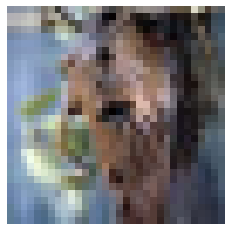

0


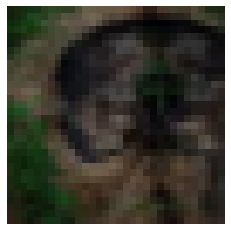

0


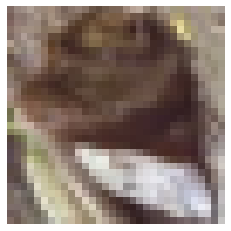

0


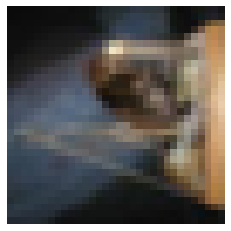

0


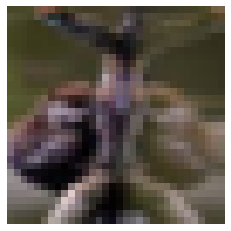

0


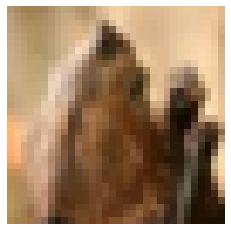

0


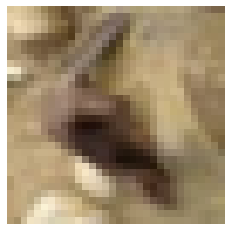

0


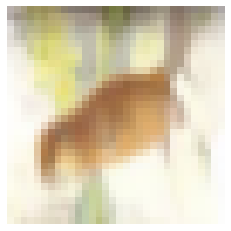

0


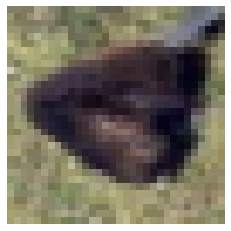

0


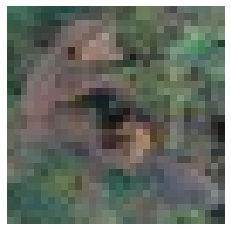

0


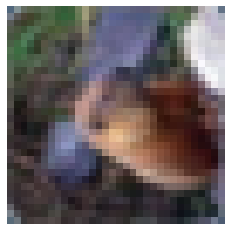

0


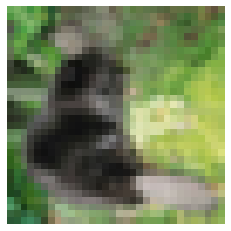

0


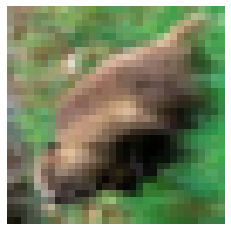

0


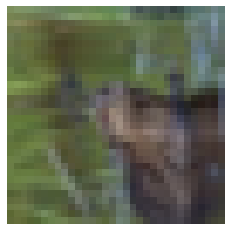

0


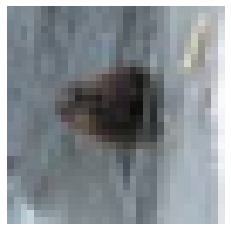

0


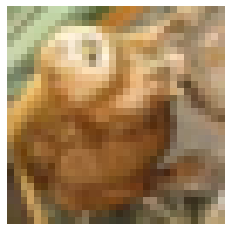

0


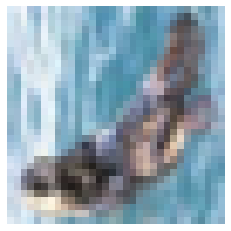

0


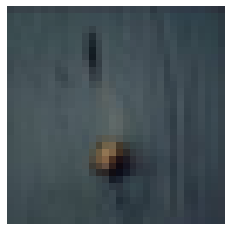

0


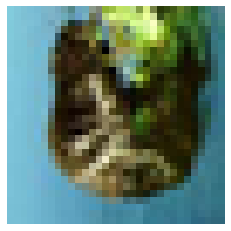

0


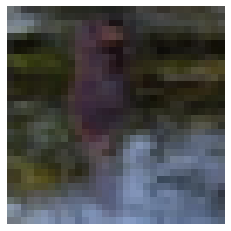

0


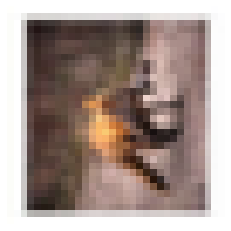

0


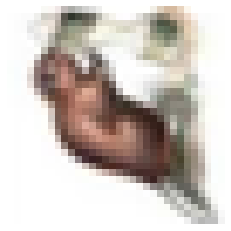

0


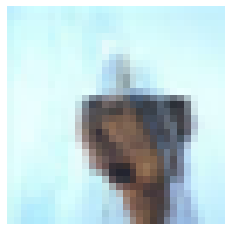

0


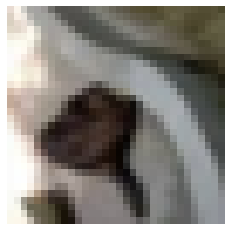

0


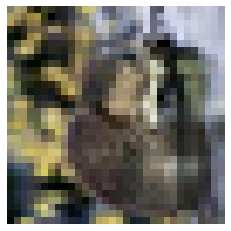

0


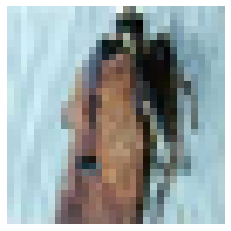

0


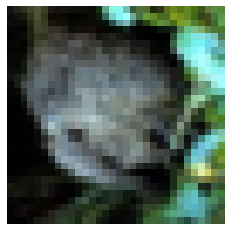

0


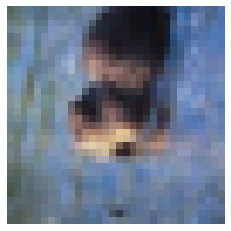

0


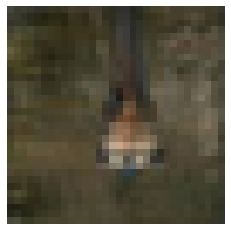

0


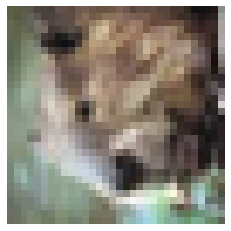

0


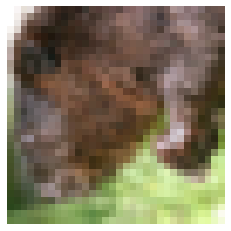

0


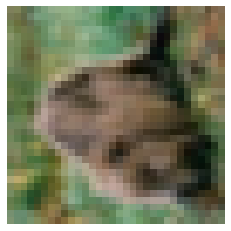

0


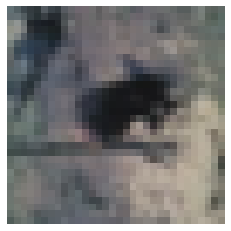

0


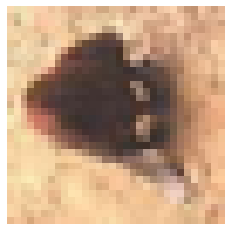

0


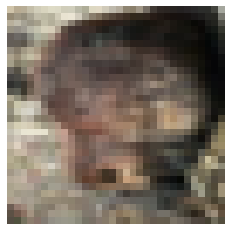

0


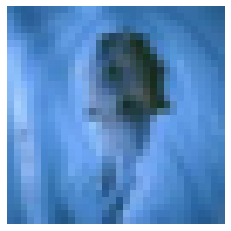

0


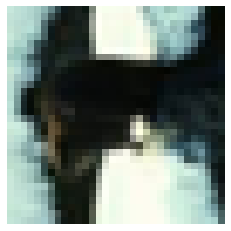

0


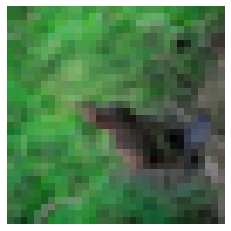

0


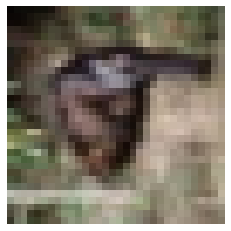

0


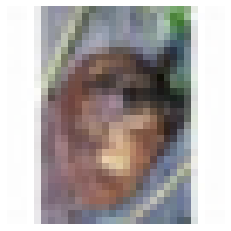

0


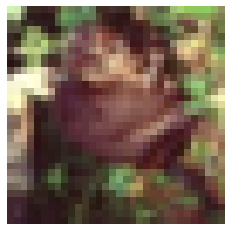

0


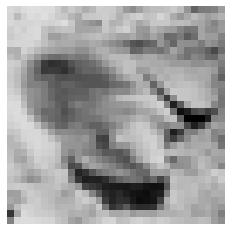

0


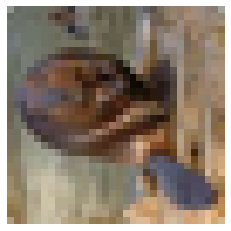

0


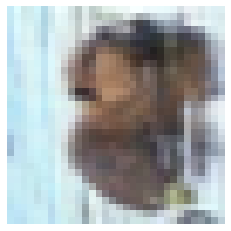

0


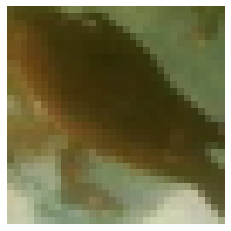

0


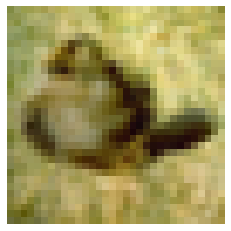

0


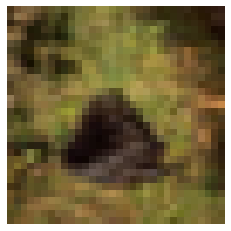

0


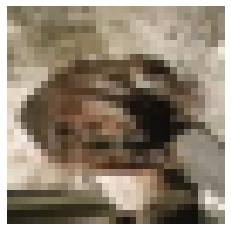

0


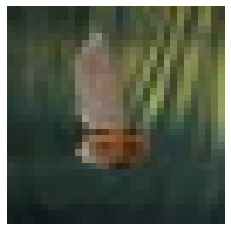

0


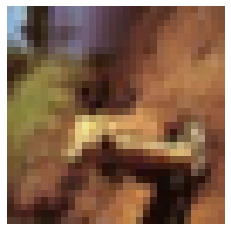

0


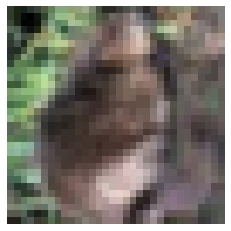

0


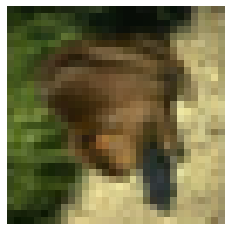

0


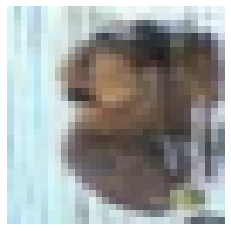

0


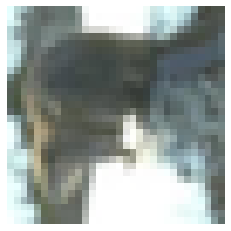

0


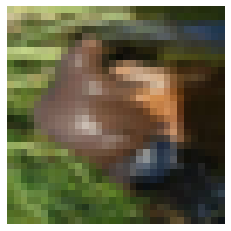

0


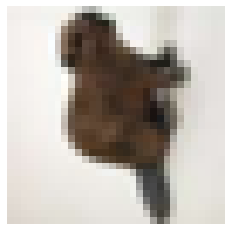

0


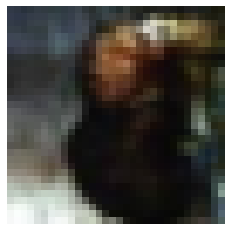

0


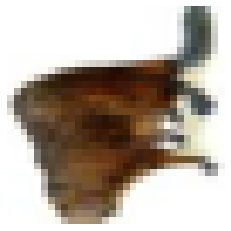

0


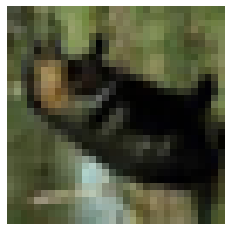

0


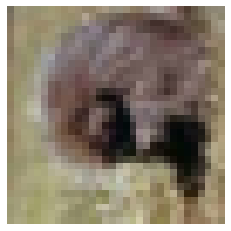

0


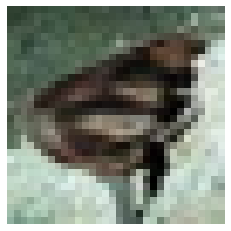

0


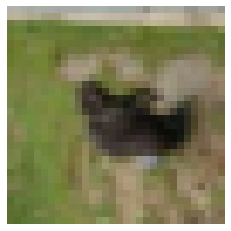

0


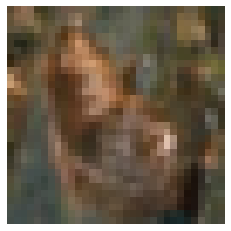

0


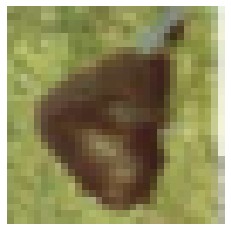

0


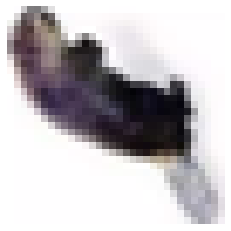

0


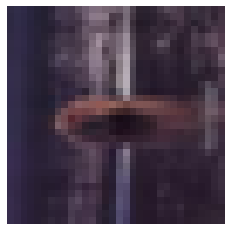

0


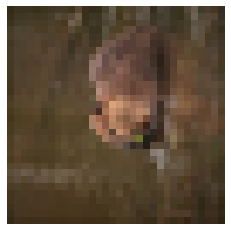

0


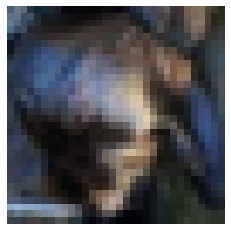

0


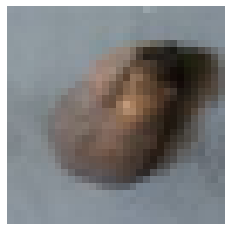

0


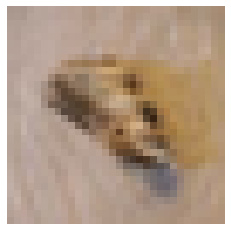

0


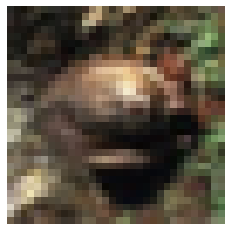

0


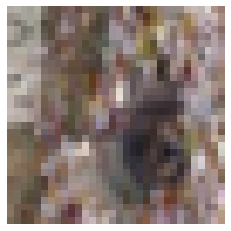

0


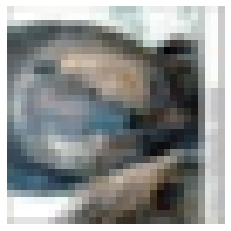

0


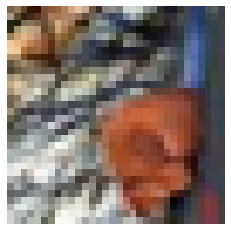

0


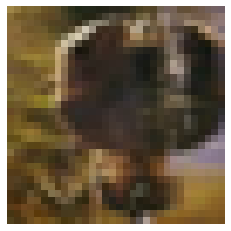

0


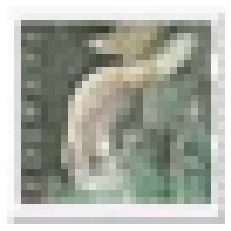

0


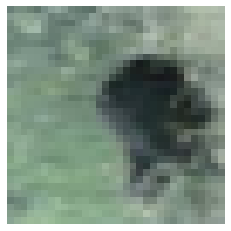

0


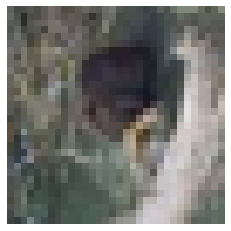

0


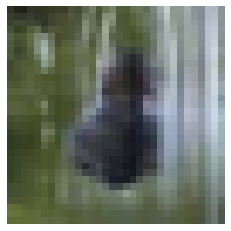

0


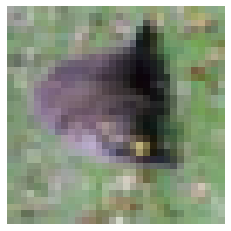

0


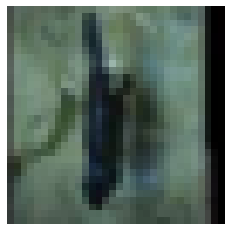

0


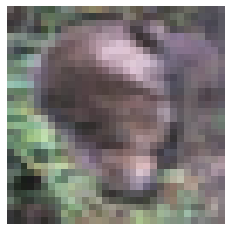

0


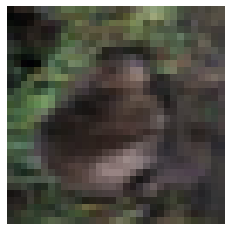

0


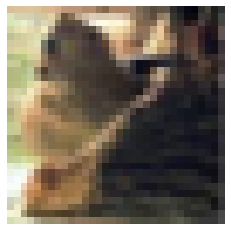

0


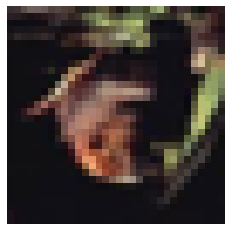

0


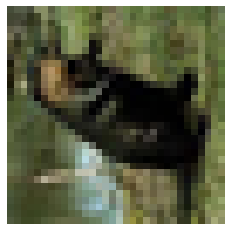

0


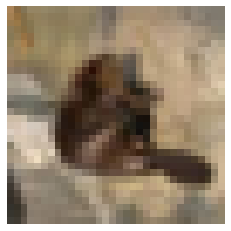

0


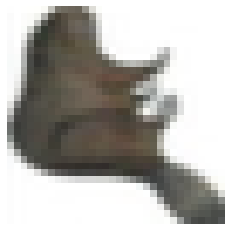

0


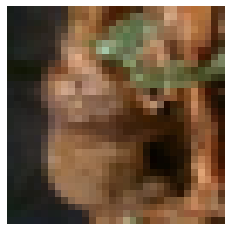

0


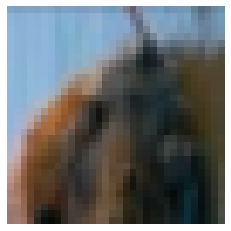

0


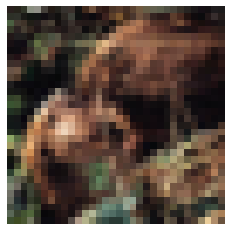

0


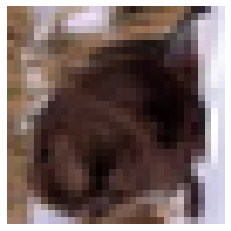

0


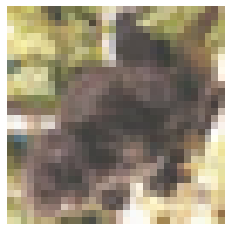

0


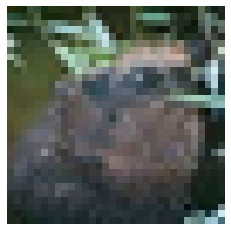

0


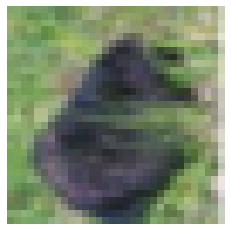

0


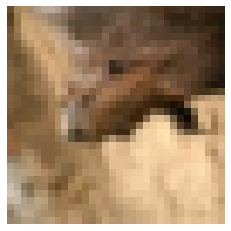

0


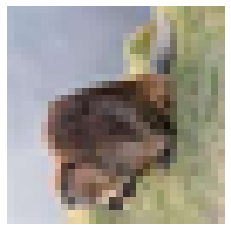

0


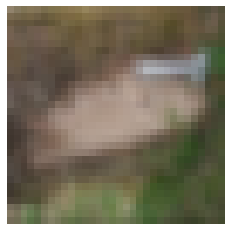

0


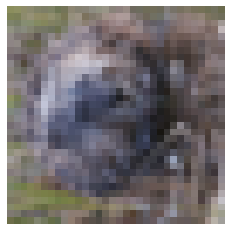

0


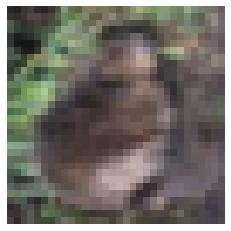

0


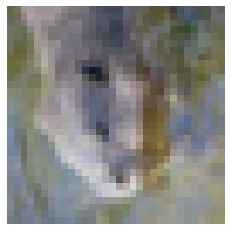

0


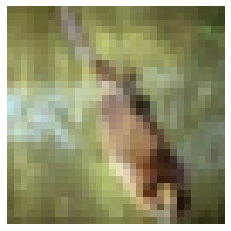

0


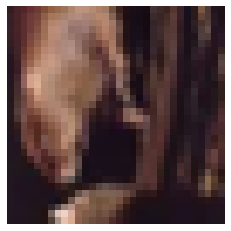

0


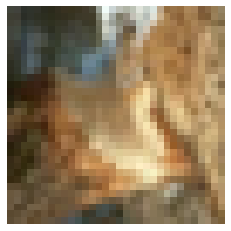

0


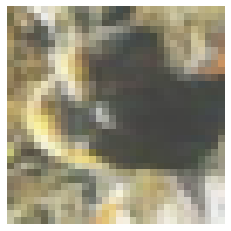

0


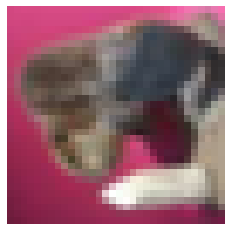

0


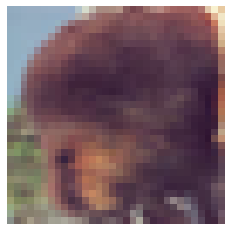

0


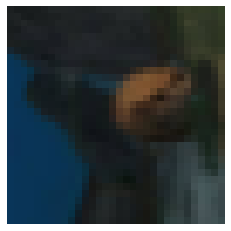

0


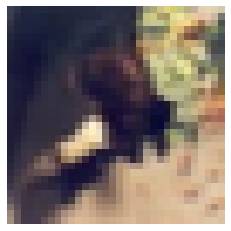

0


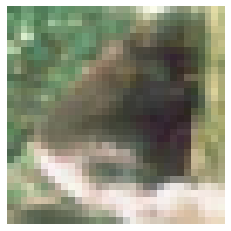

0


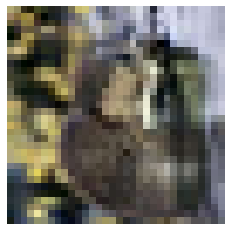

0


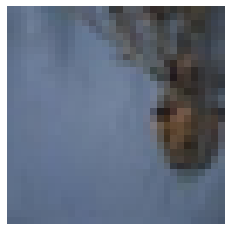

0


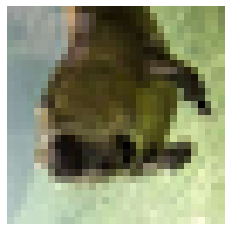

0


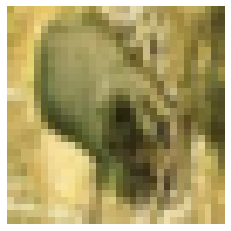

0


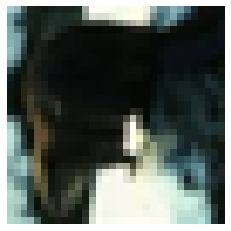

0


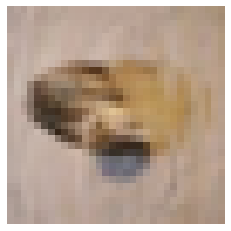

0


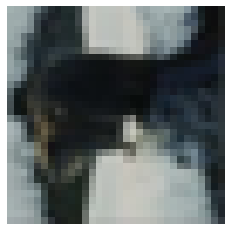

0


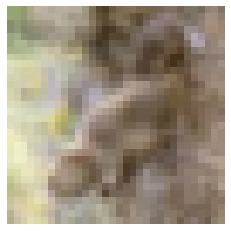

0


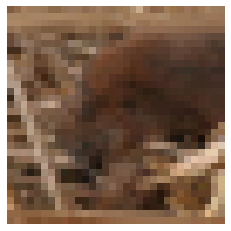

0


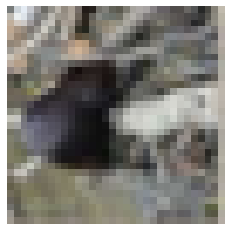

0


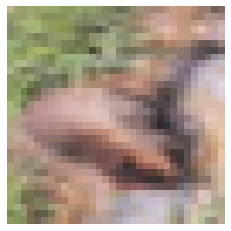

0


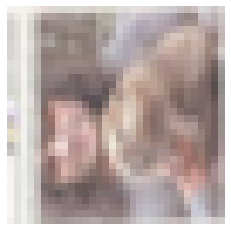

0


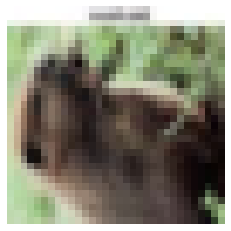

0


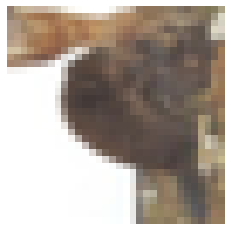

0


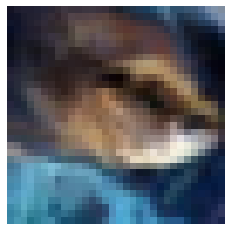

0


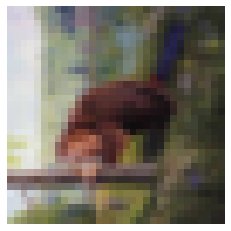

0


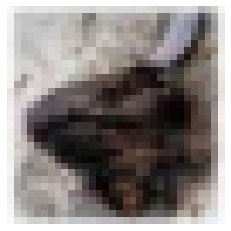

0


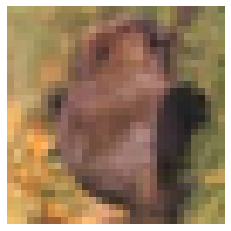

0


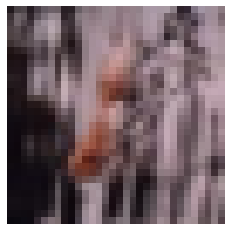

0


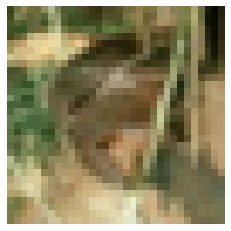

0


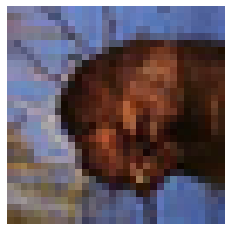

0


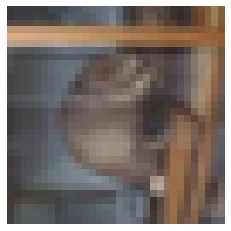

0


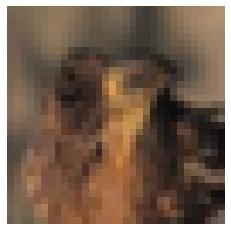

0


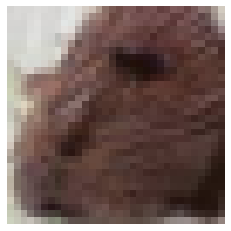

0


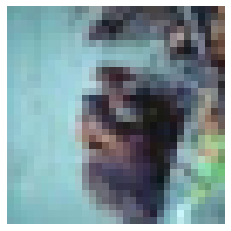

0


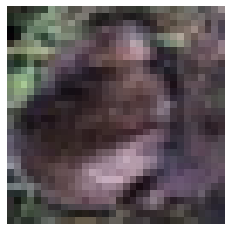

0


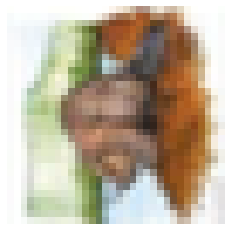

0


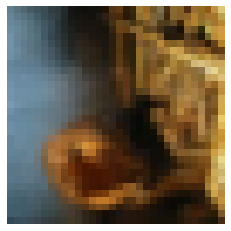

0


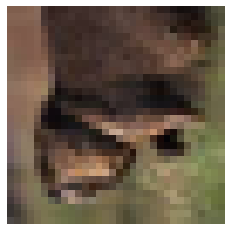

0


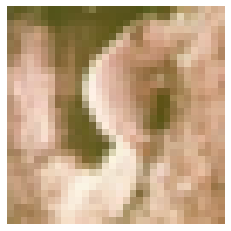

0


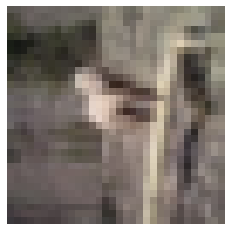

0


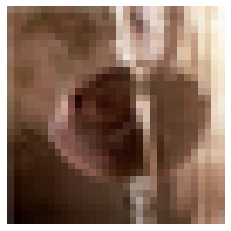

0


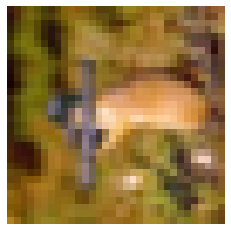

0


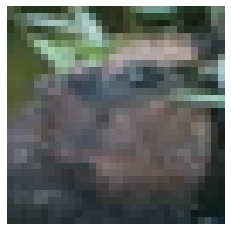

0


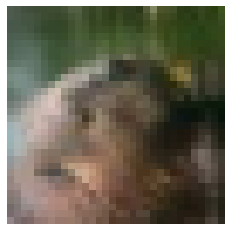

0


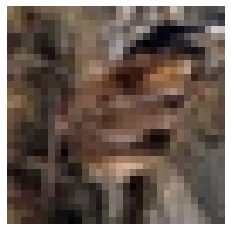

0


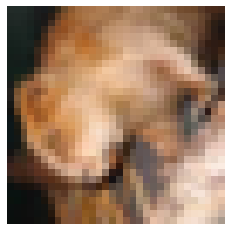

0


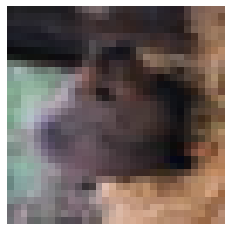

0


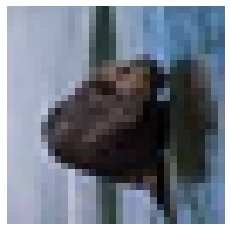

0


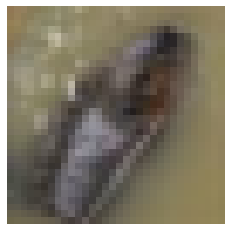

0


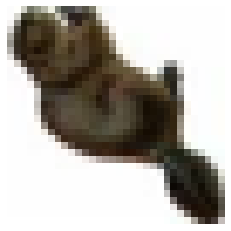

0


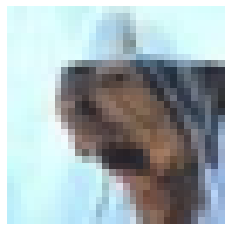

0


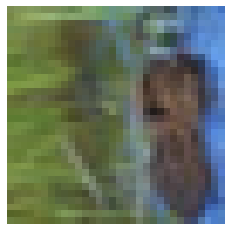

0


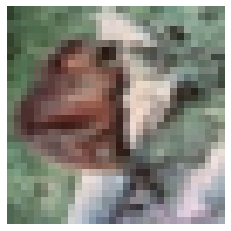

0


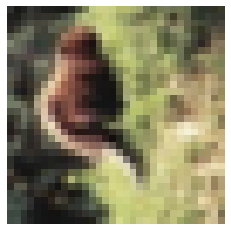

0


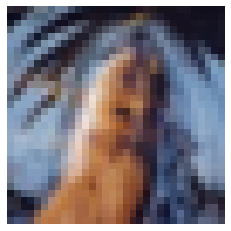

0


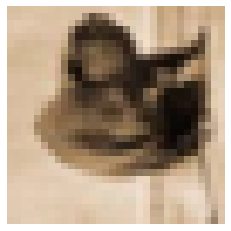

0


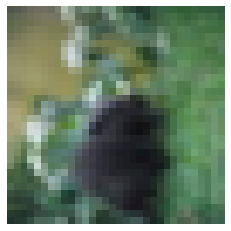

0


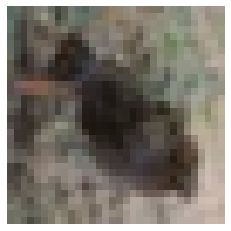

0


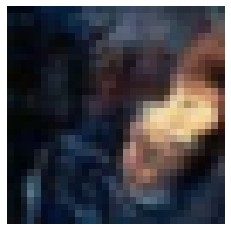

0


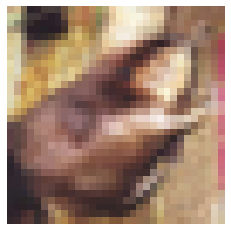

0


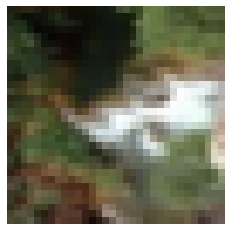

0


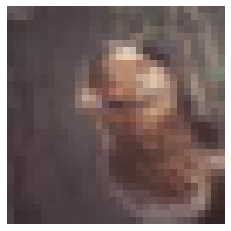

0


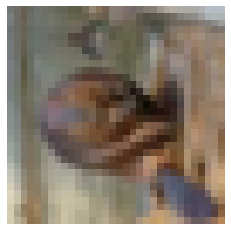

0


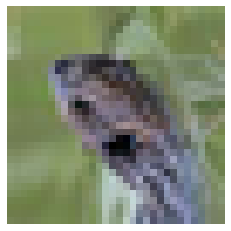

0


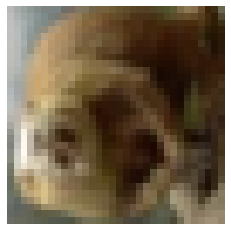

0


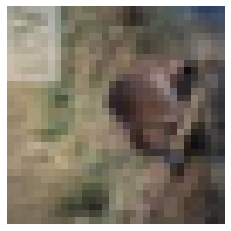

0


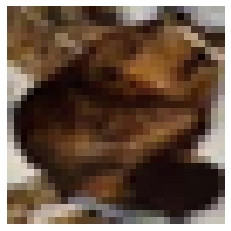

0


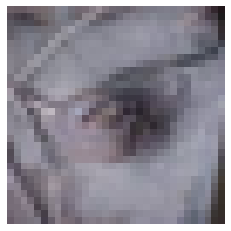

0


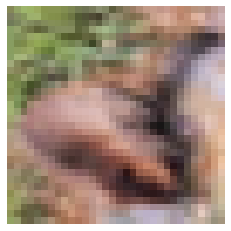

0


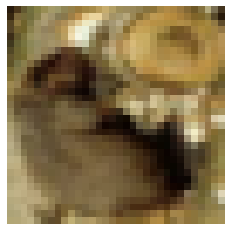

0


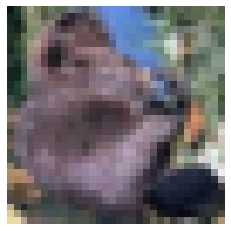

0


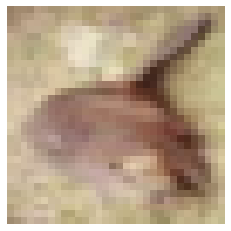

0


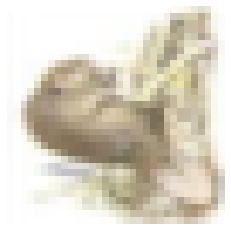

0


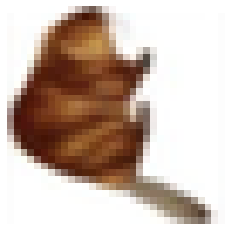

0


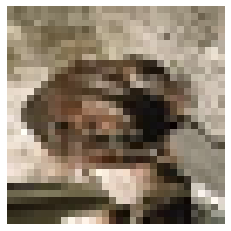

0


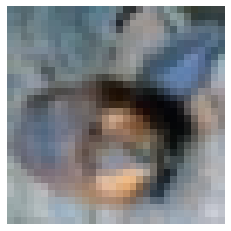

0


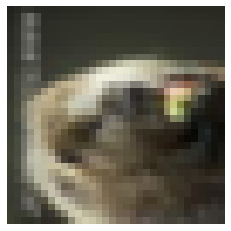

0


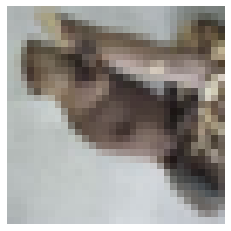

0


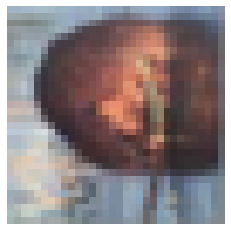

0


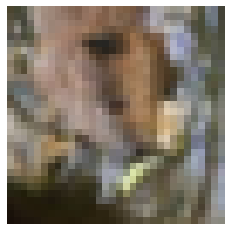

0


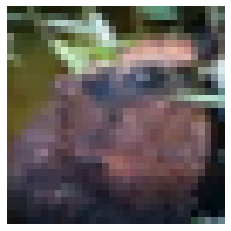

0


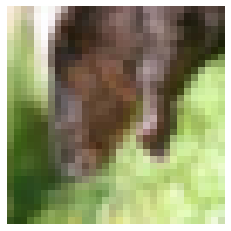

0


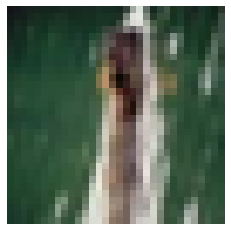

0


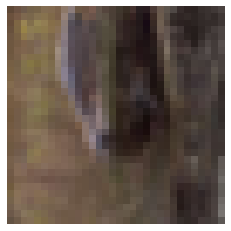

0


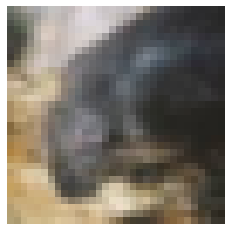

0


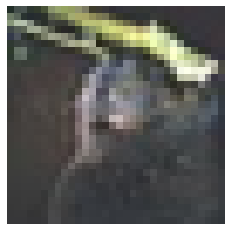

0


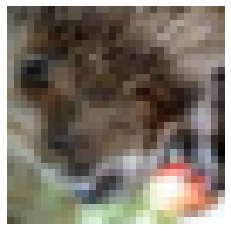

0


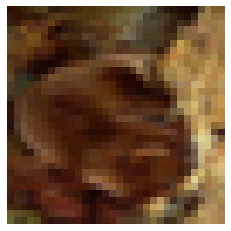

0


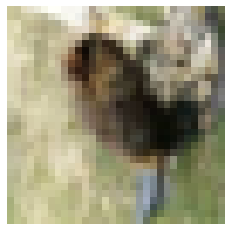

0


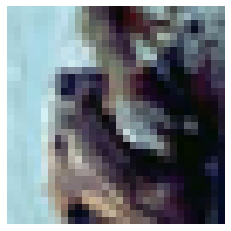

0


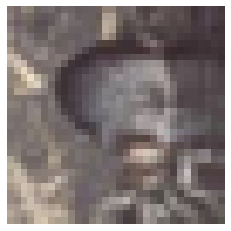

0


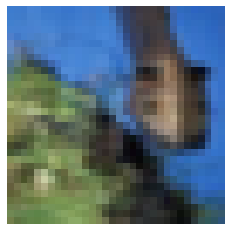

0


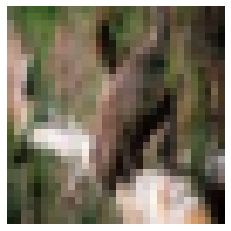

0


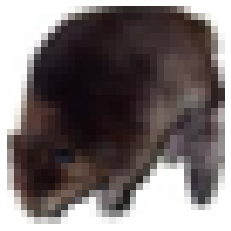

0


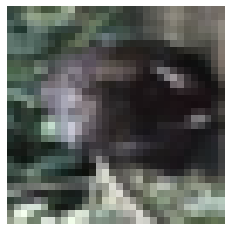

0


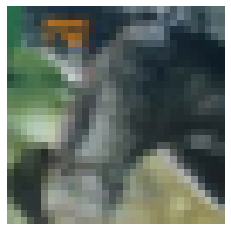

0


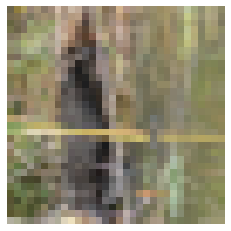

0


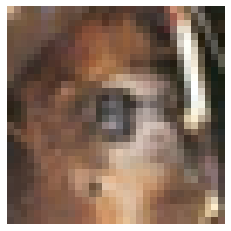

0


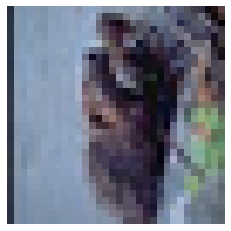

0


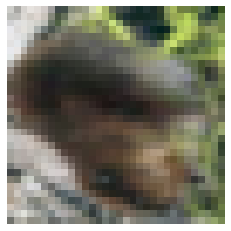

0


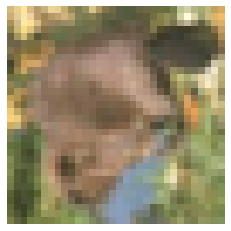

0


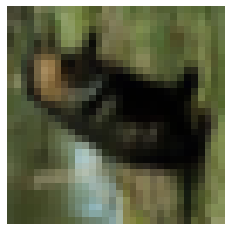

0


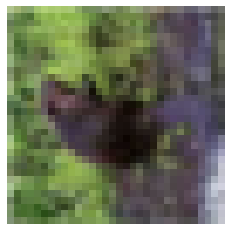

0


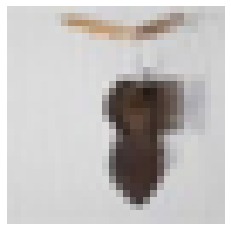

0


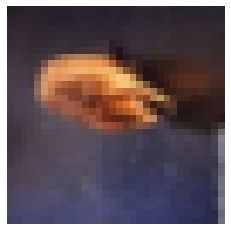

0


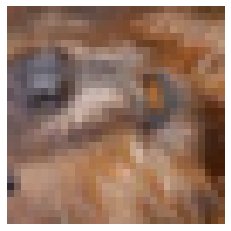

0


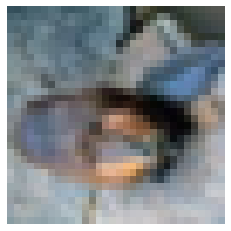

0


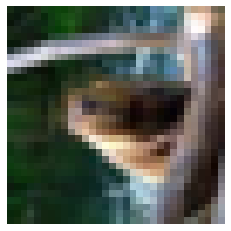

0


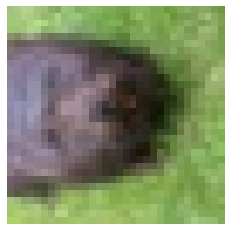

0


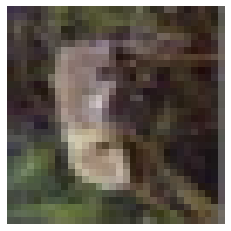

0


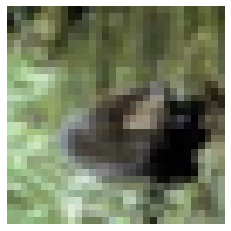

0


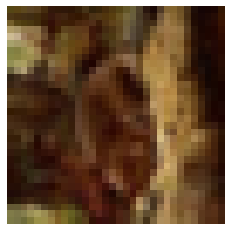

0


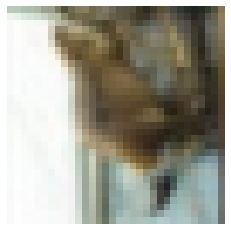

0


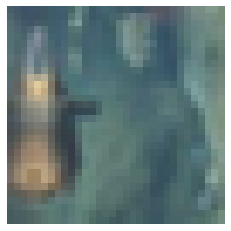

0


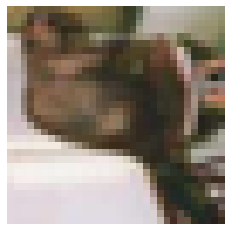

0


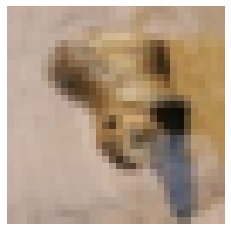

0


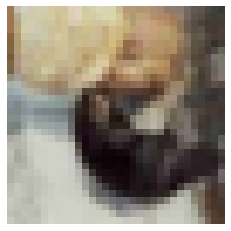

0


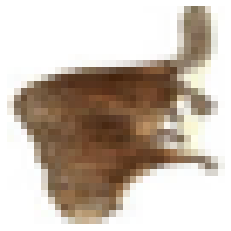

0


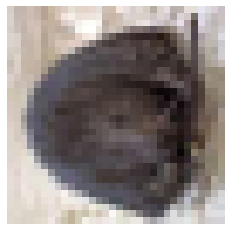

0


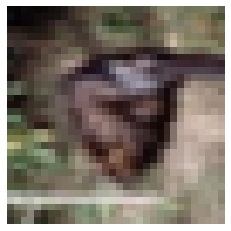

0


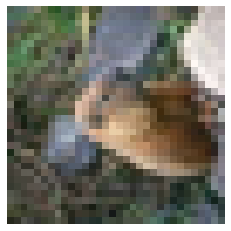

0


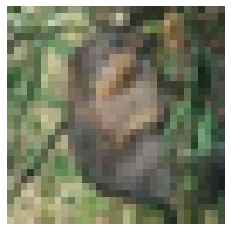

0


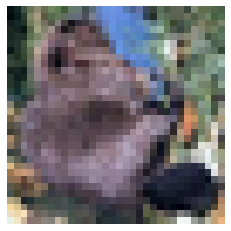

0


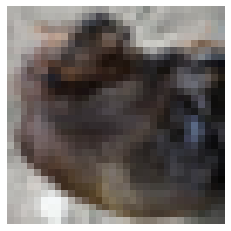

0


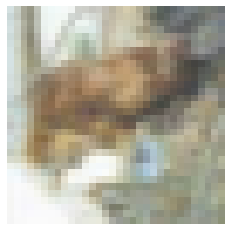

0


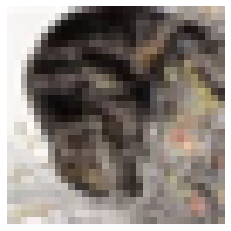

0


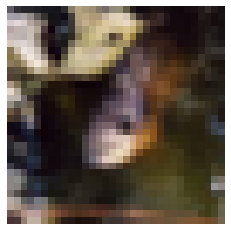

0


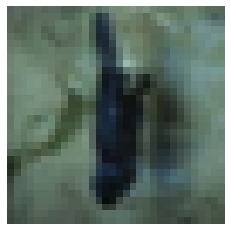

0


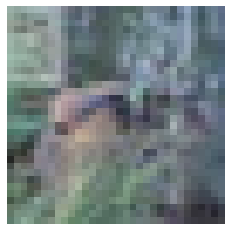

0


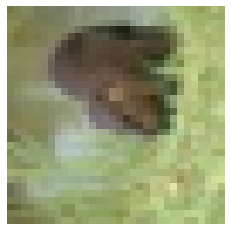

0


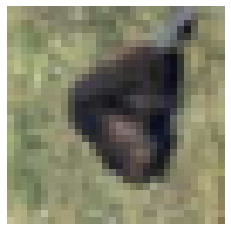

0


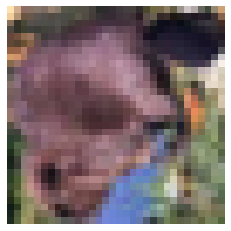

0


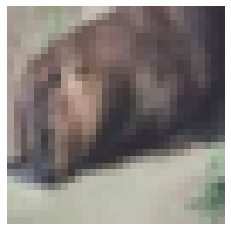

0


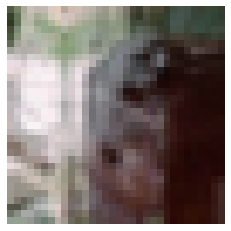

0


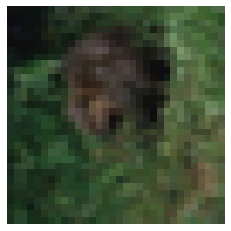

0


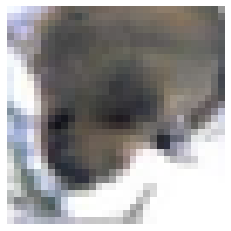

0


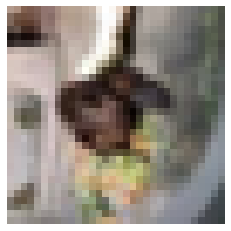

0


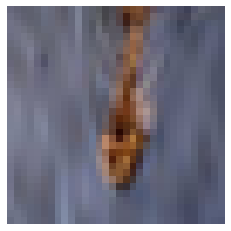

0


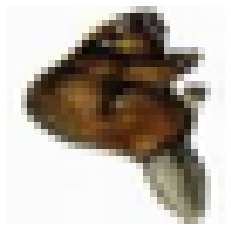

0


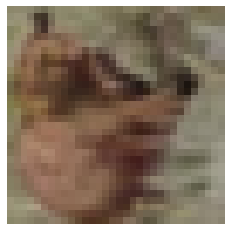

0


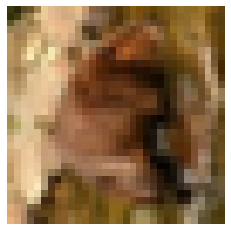

0


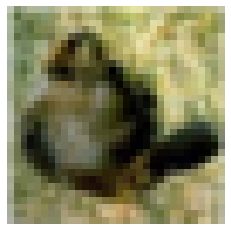

0


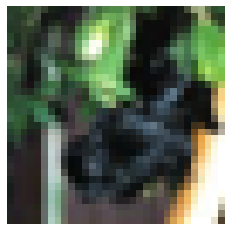

0


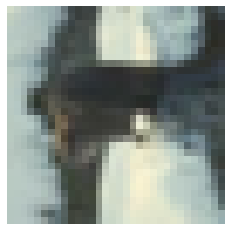

0


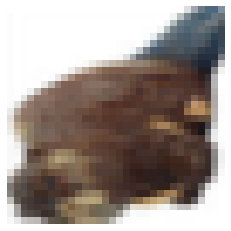

0


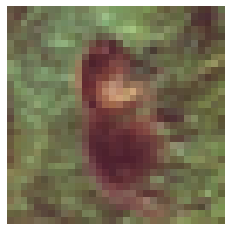

0


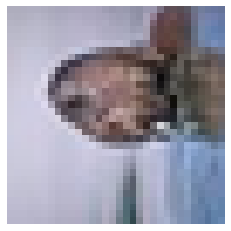

0


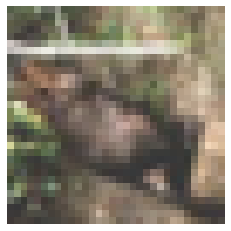

0


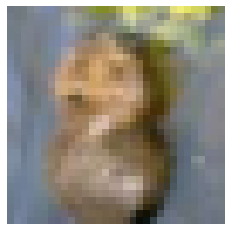

0


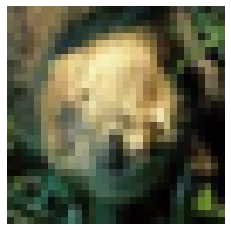

0


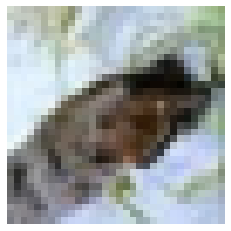

0


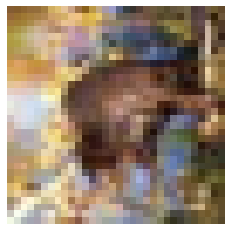

0


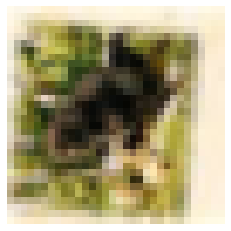

0


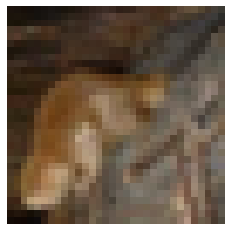

0


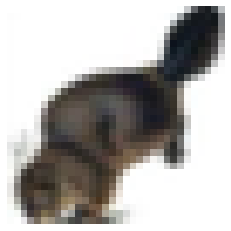

0


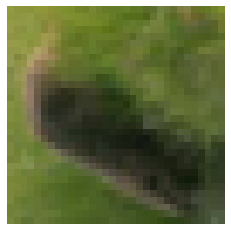

0


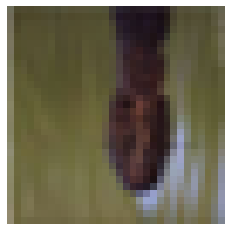

0


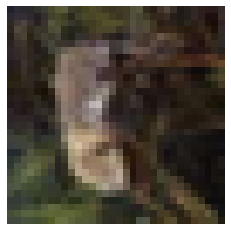

0


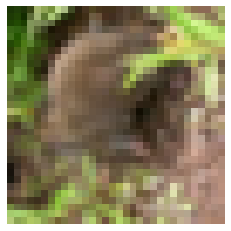

0


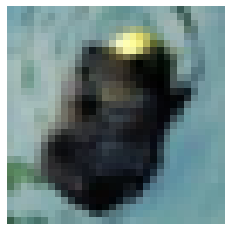

0


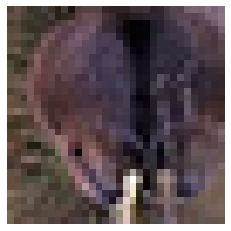

0


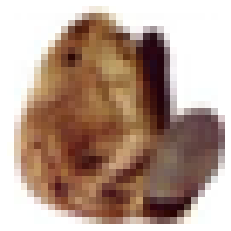

0


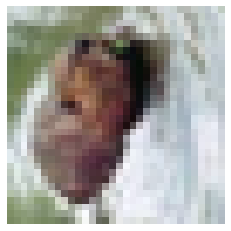

0


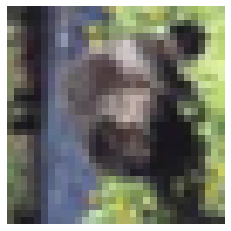

0


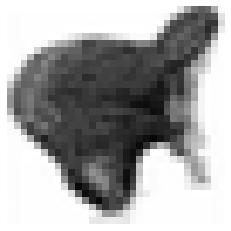

0


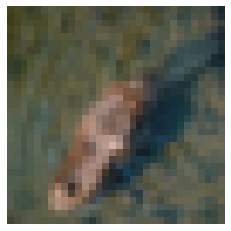

0


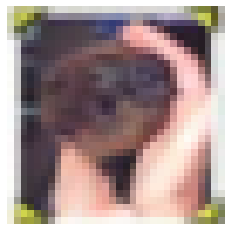

0


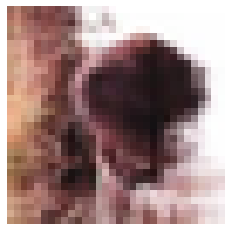

0


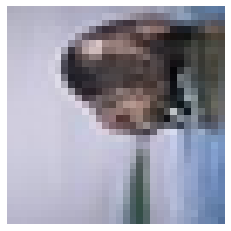

0


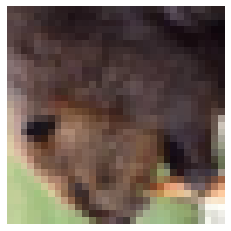

0


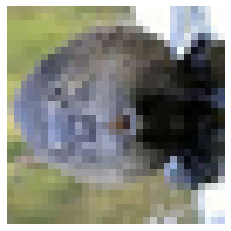

0


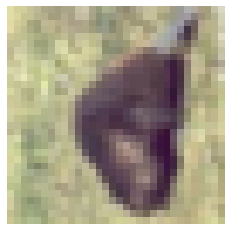

0


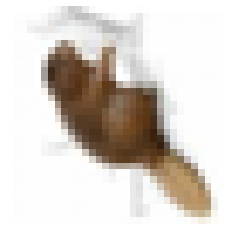

0


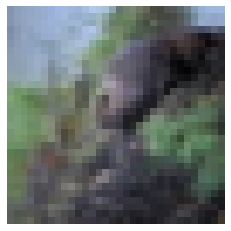

0


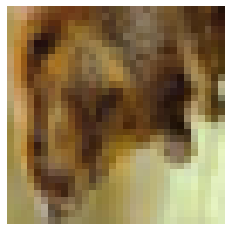

0


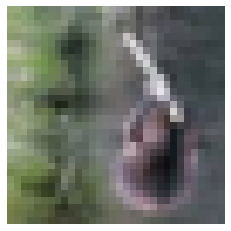

0


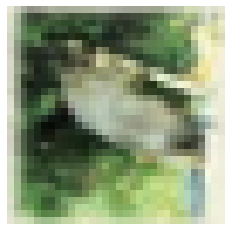

0


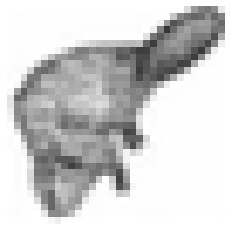

0


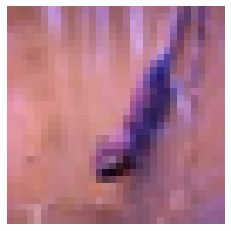

0


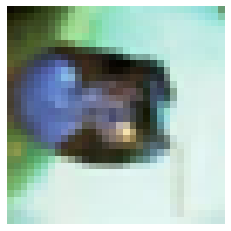

0


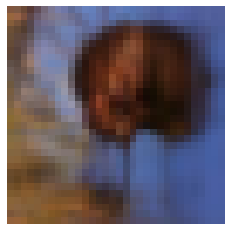

0


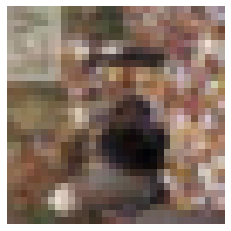

0


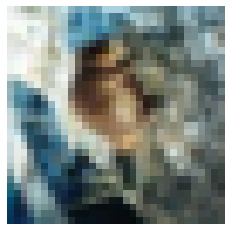

0


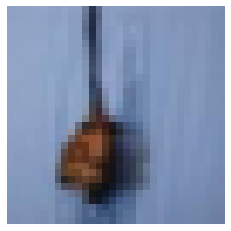

0


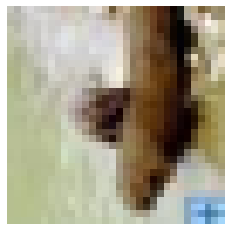

0


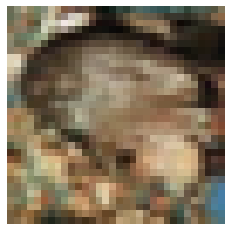

0


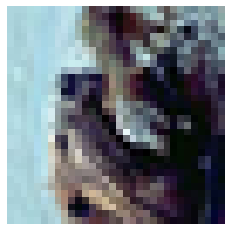

0


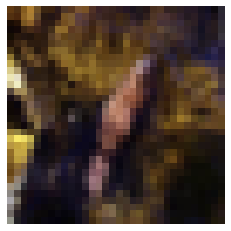

0


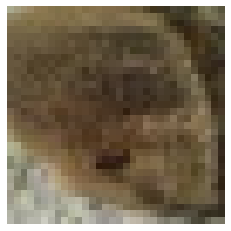

0


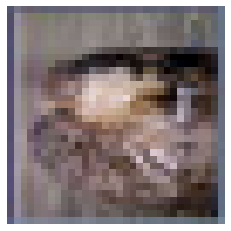

0


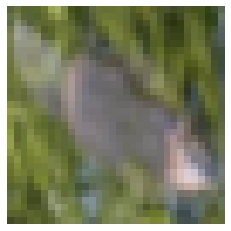

0


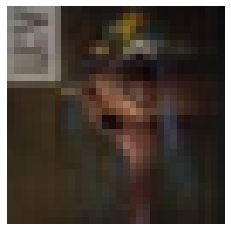

0


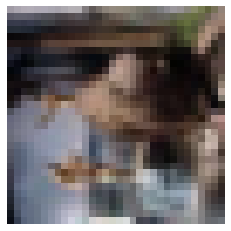

0


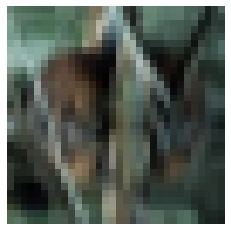

0


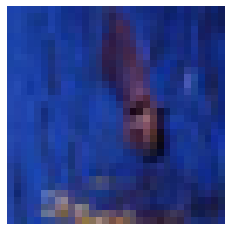

0


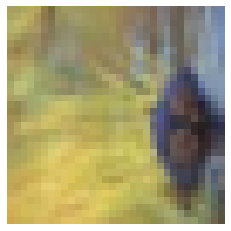

0


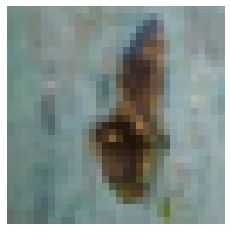

0


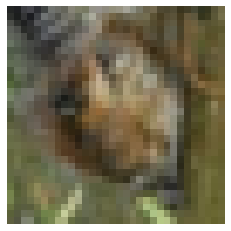

0


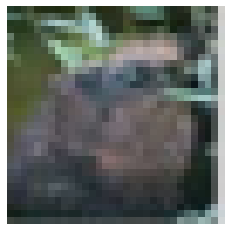

0


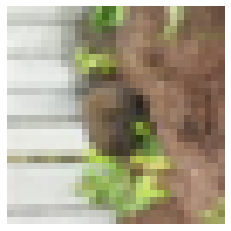

0


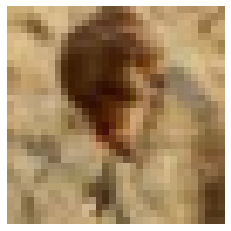

0


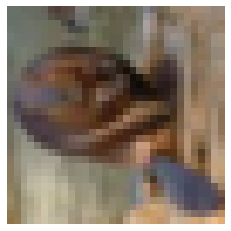

0


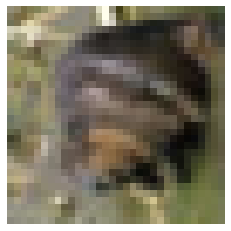

0


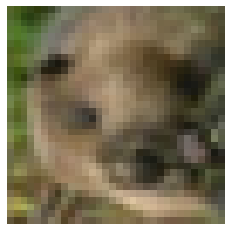

0


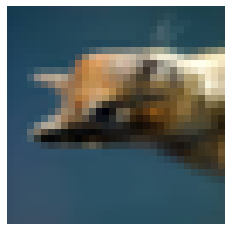

0


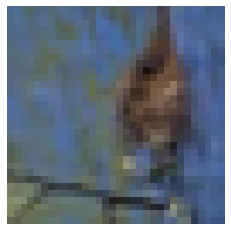

0


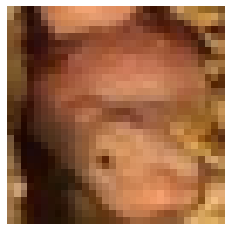

0


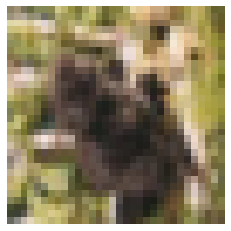

0


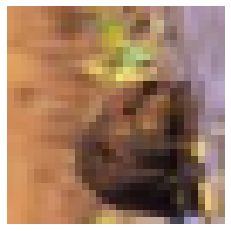

0


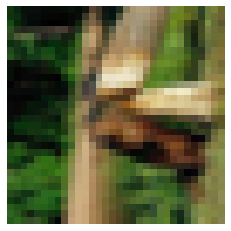

0


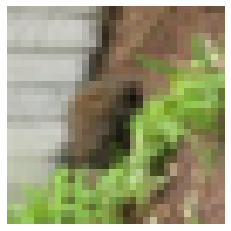

0


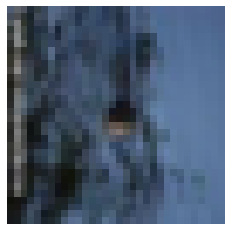

0


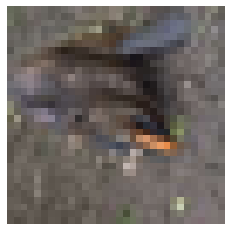

0


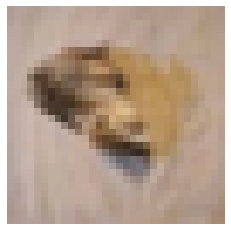

0


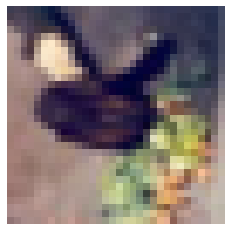

0


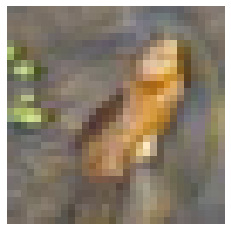

0


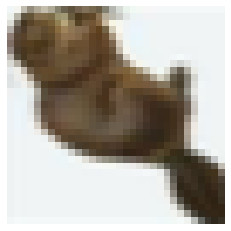

0


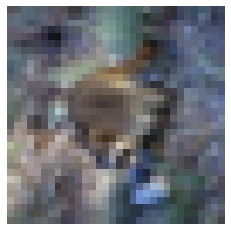

0


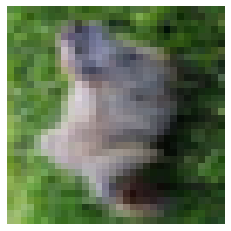

0


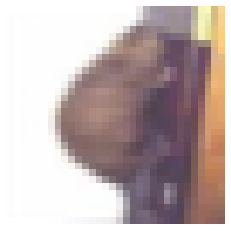

0


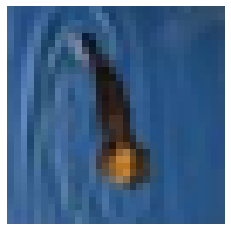

0


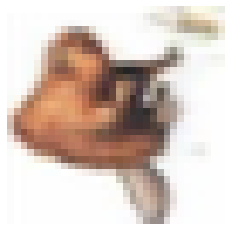

0


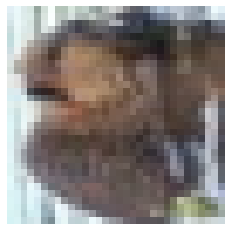

0


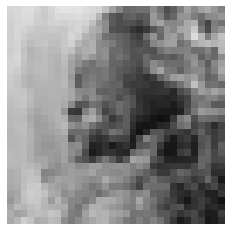

0


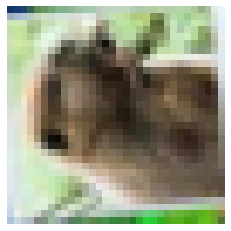

0


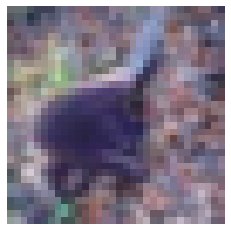

0


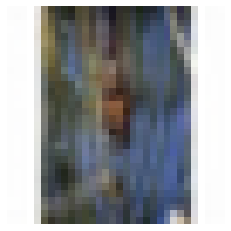

0


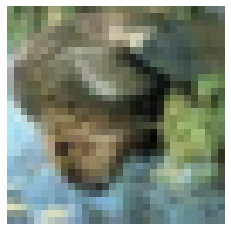

0


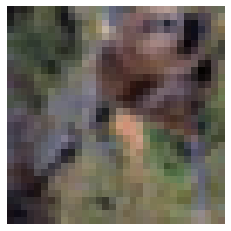

0


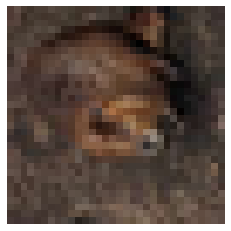

0


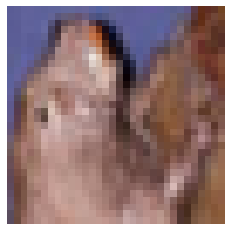

0


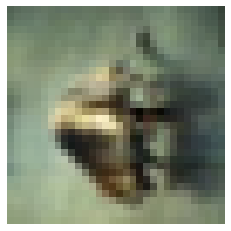

0


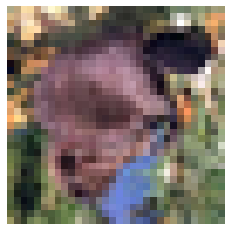

0


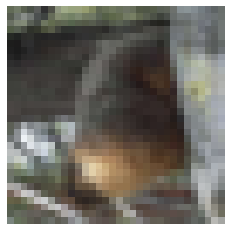

0


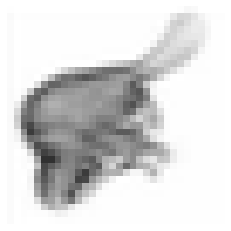

0


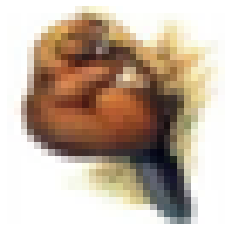

0


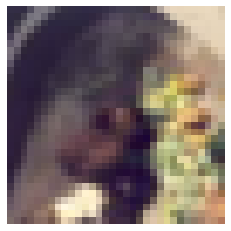

0


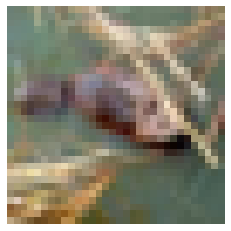

0


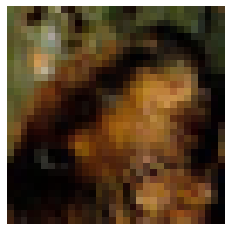

0


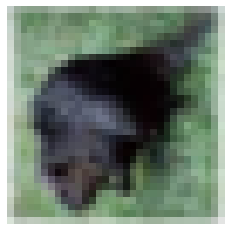

0


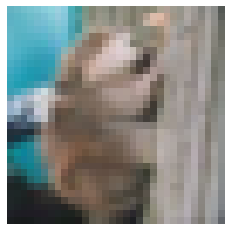

0


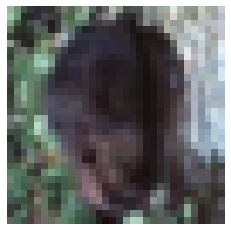

0


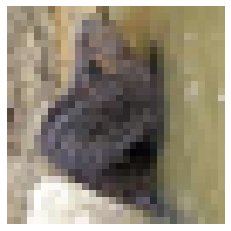

0


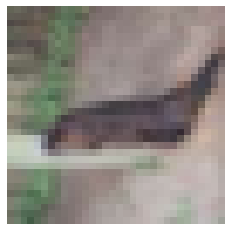

0


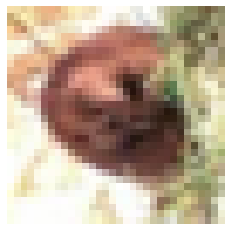

0


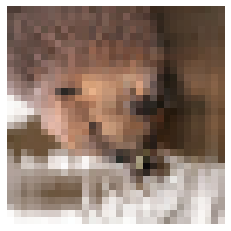

0


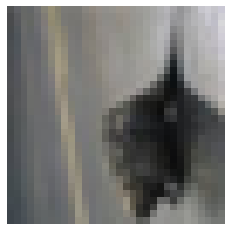

0


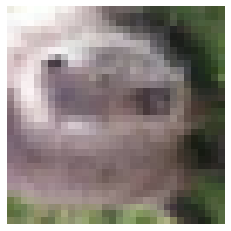

0


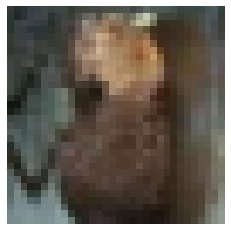

0


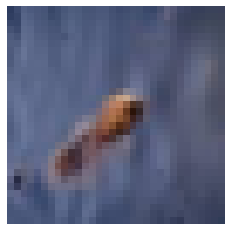

0


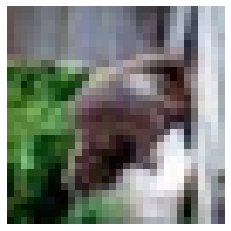

0


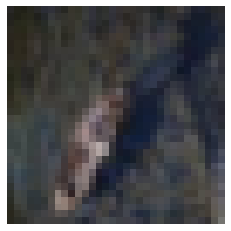

0


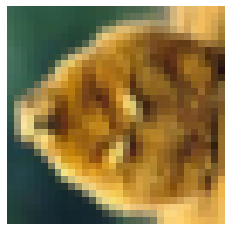

0


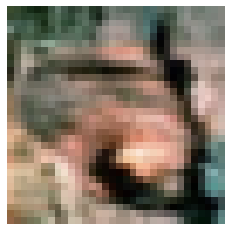

0


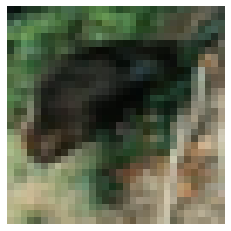

0


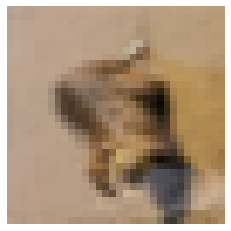

0


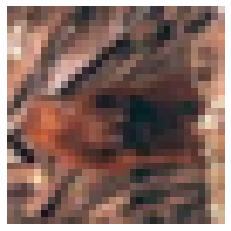

0


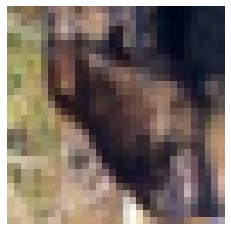

0


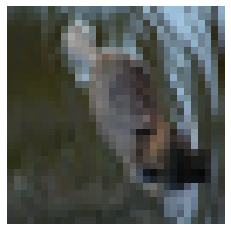

0


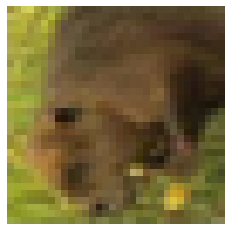

0


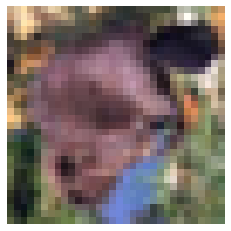

0


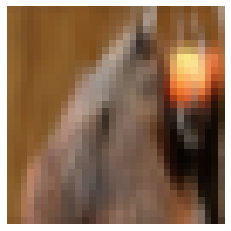

0


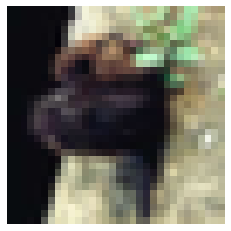

0


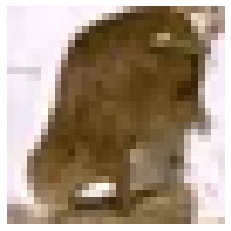

0


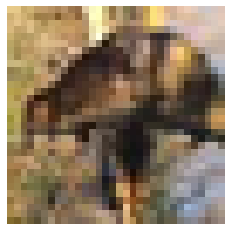

0


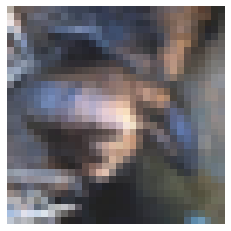

0


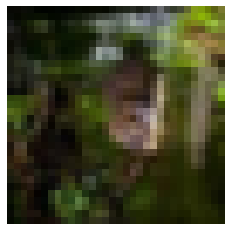

0


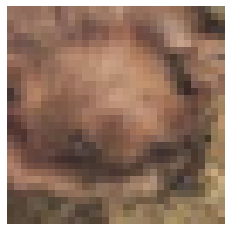

0


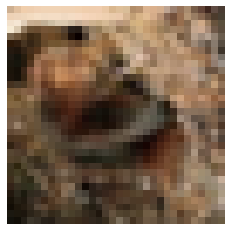

0


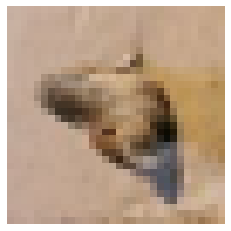

0


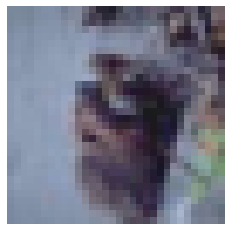

0


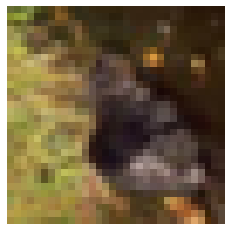

0


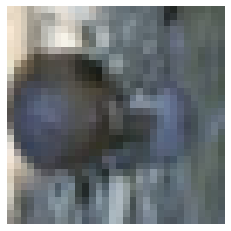

0


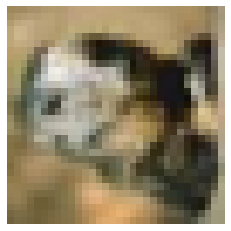

0


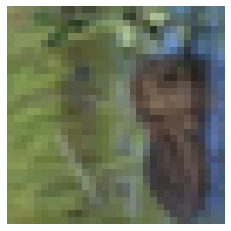

0


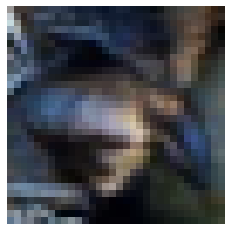

0


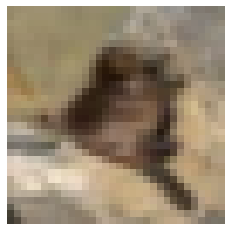

0


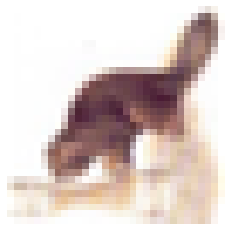

0


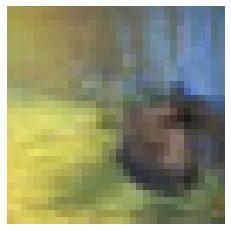

0


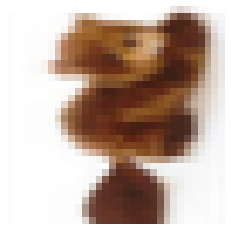

0


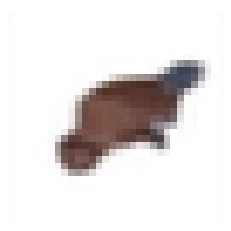

0


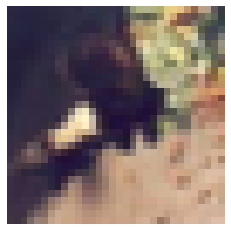

0


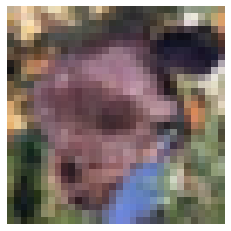

0


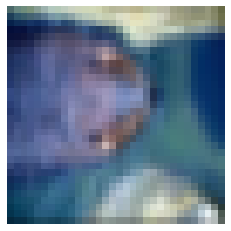

0


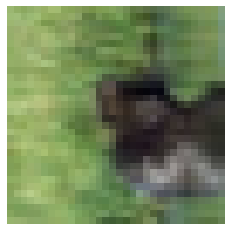

0


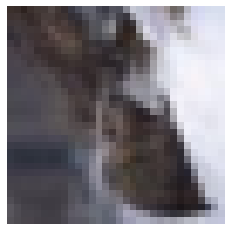

0


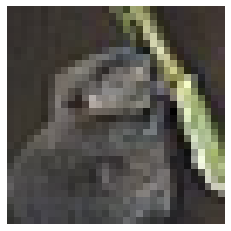

0


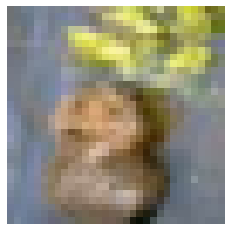

0


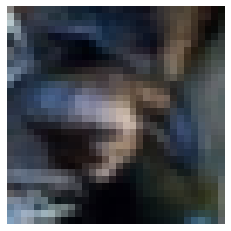

0


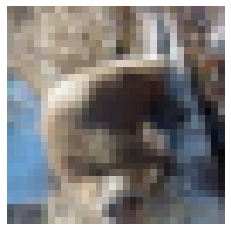

0


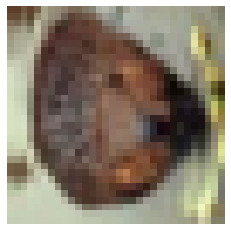

0


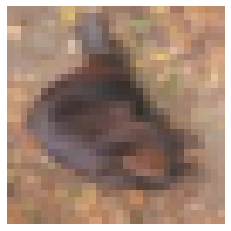

0


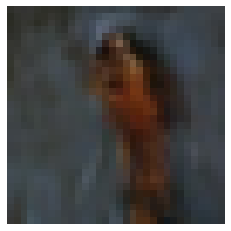

0


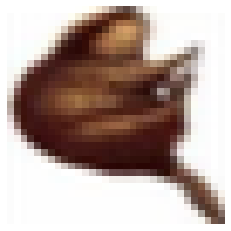

0


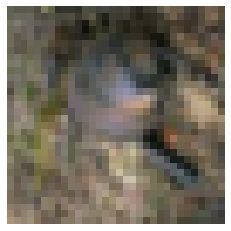

0


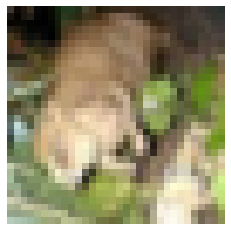

0


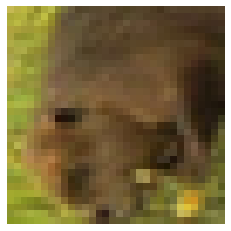

0


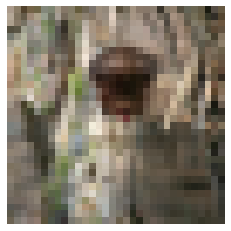

0


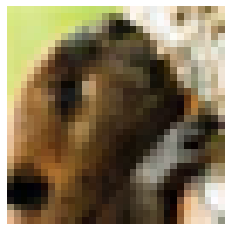

0


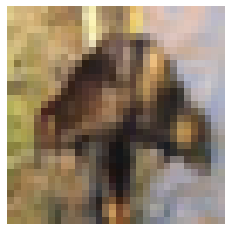

0


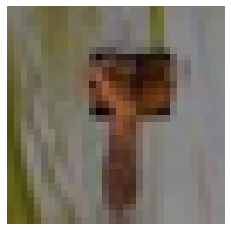

0


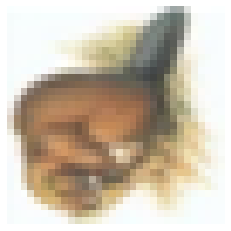

0


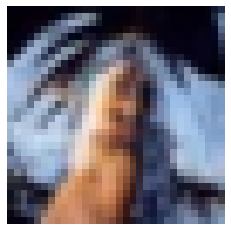

0


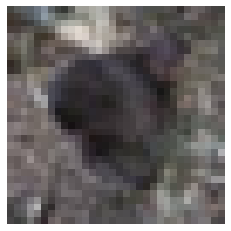

0


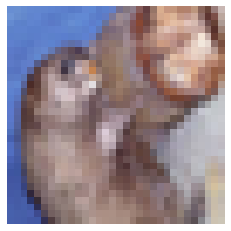

0


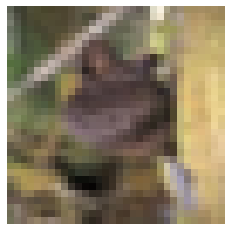

0


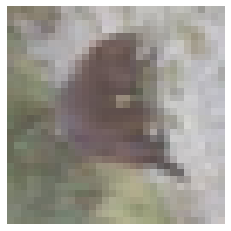

0


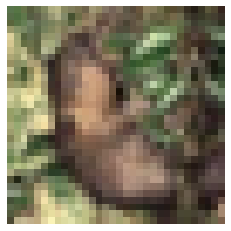

0


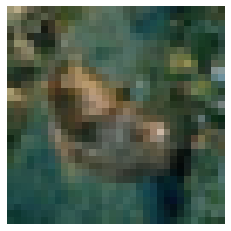

0


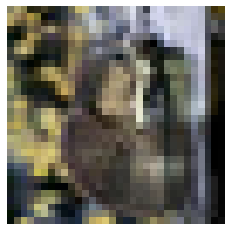

0


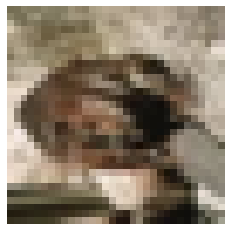

0


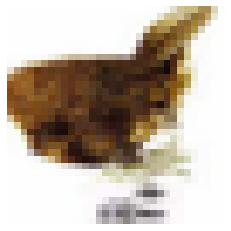

0


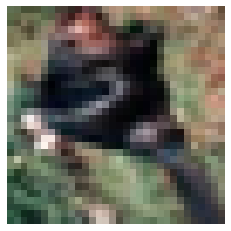

0


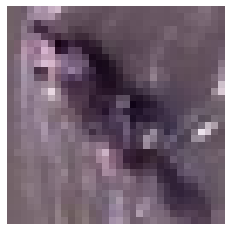

0


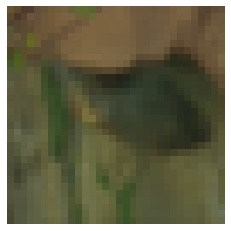

0


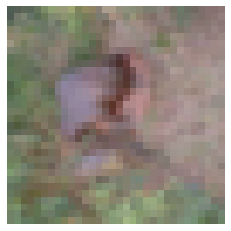

0


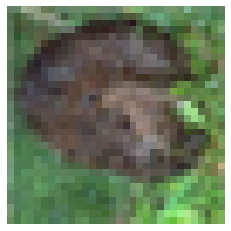

0


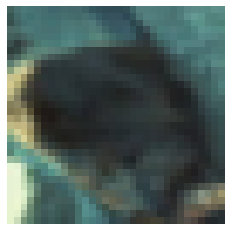

0


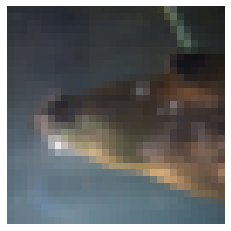

0


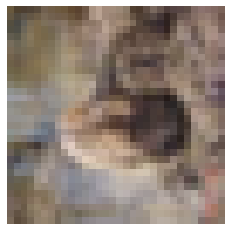

0


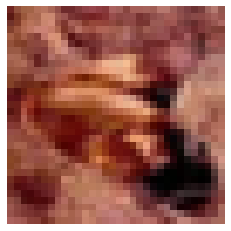

0


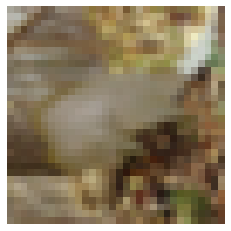

0


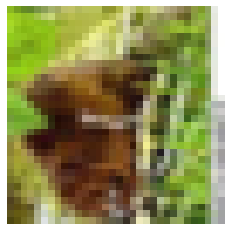

0


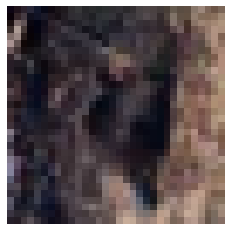

0


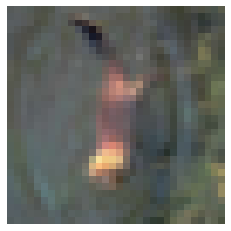

0


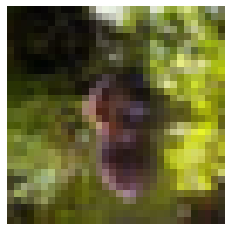

0


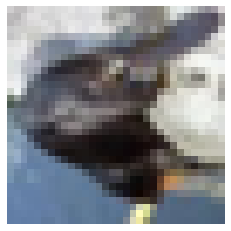

0


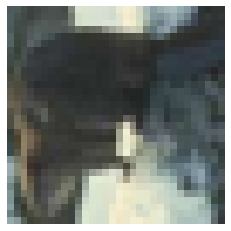

0


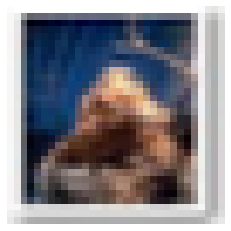

0


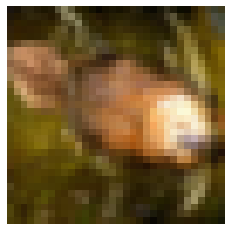

0


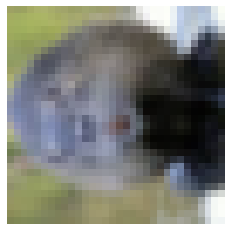

0


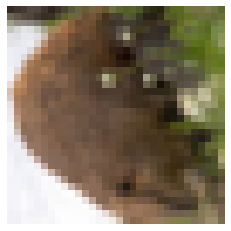

0


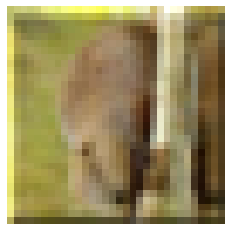

0


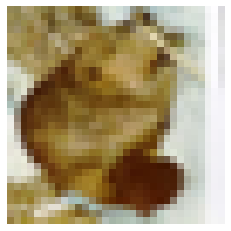

0


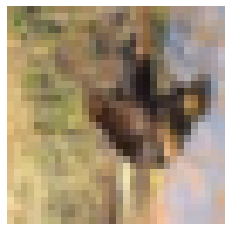

0


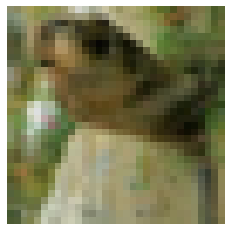

0


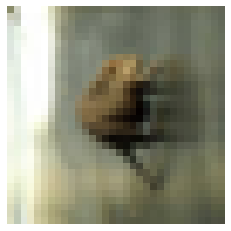

0


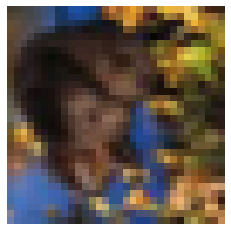

0


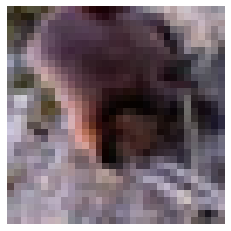

0


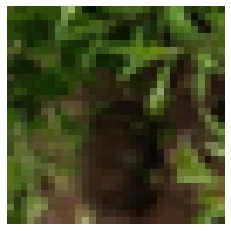

0


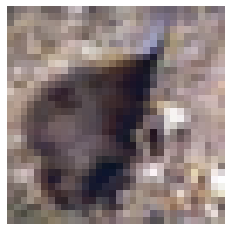

0


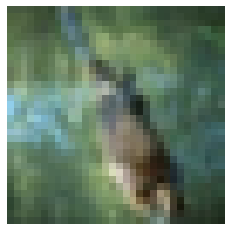

0


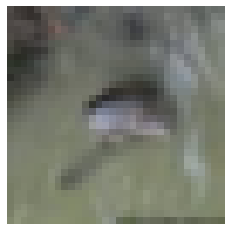

0


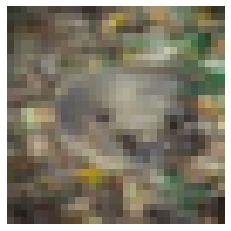

0


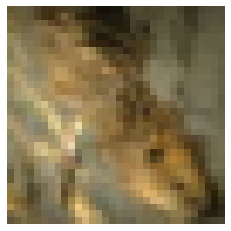

0


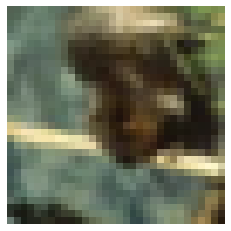

0


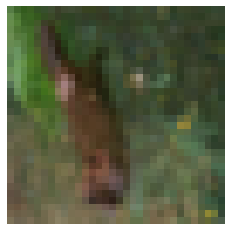

0


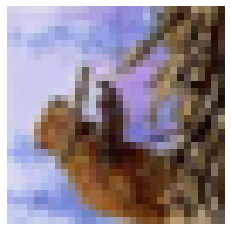

0


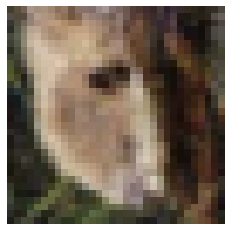

0


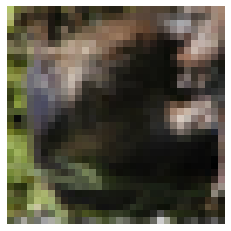

0


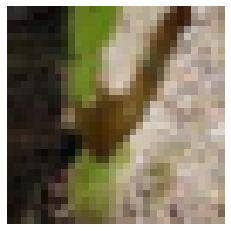

0


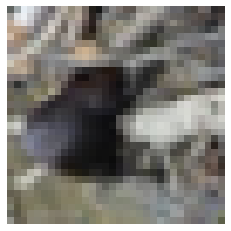

0


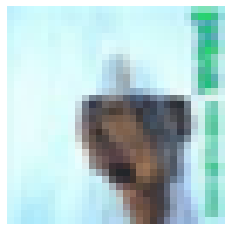

0


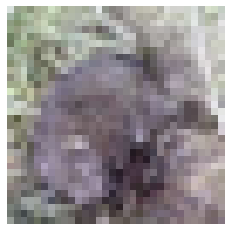

0


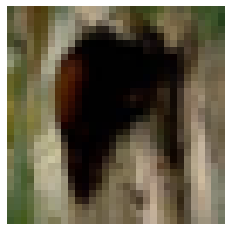

0


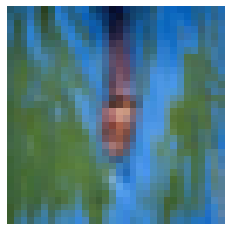

0


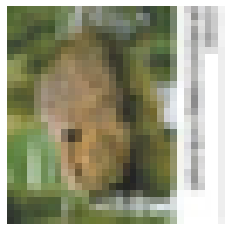

0


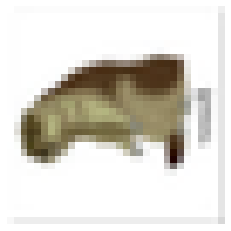

0


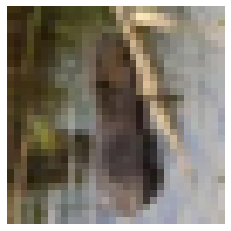

0


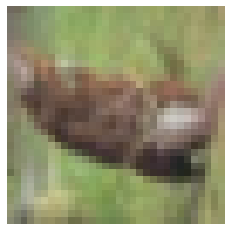

0


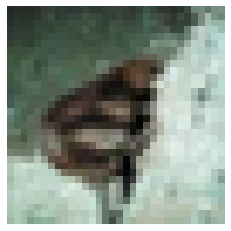

0


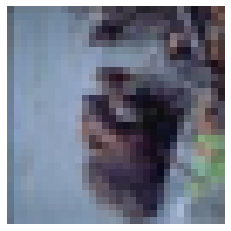

0


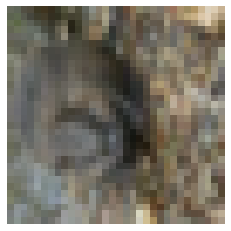

0


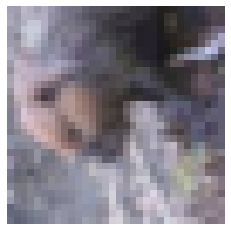

0


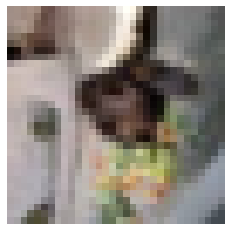

0


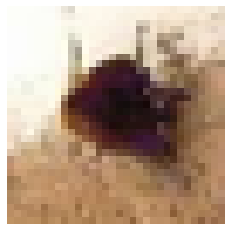

0


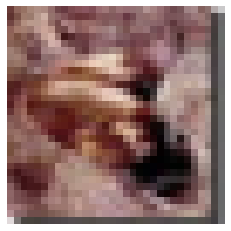

0


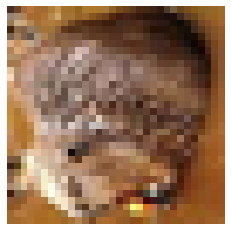

0


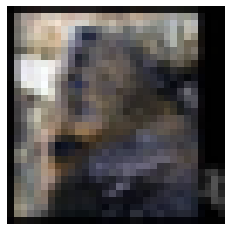

0


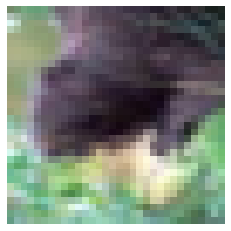

0


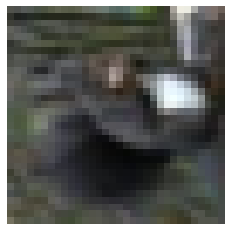

0


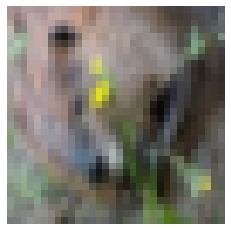

0


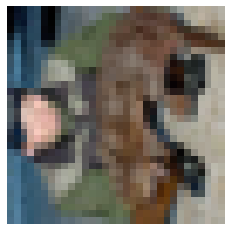

0


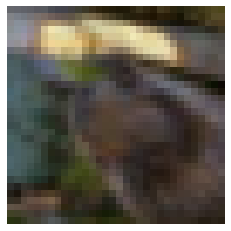

0


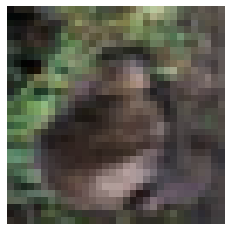

0


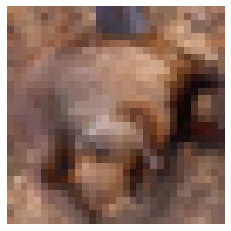

0


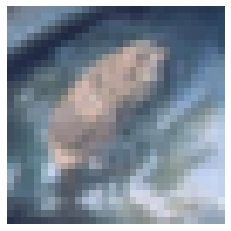

0


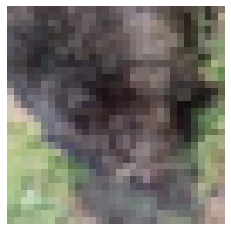

0


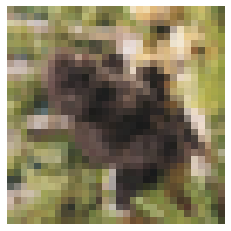

0


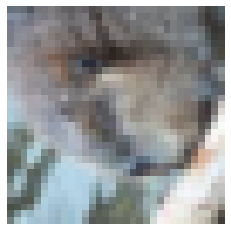

0


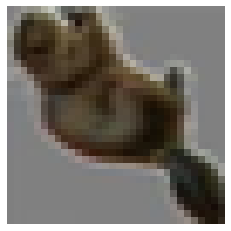

0


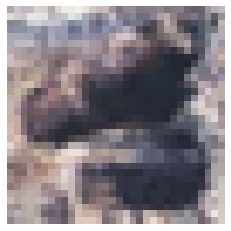

0


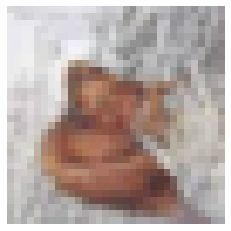

0


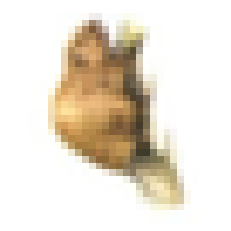

0


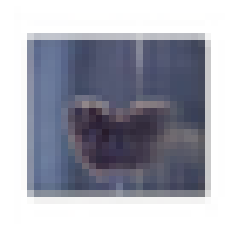

0


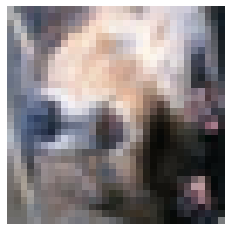

0


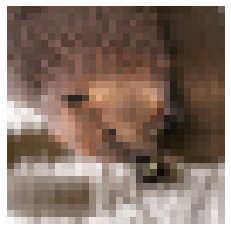

0


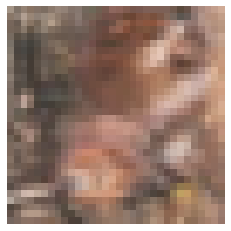

0


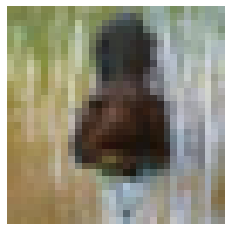

0


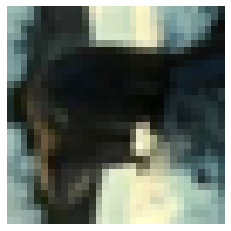

0


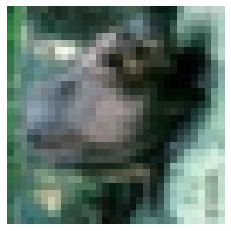

0


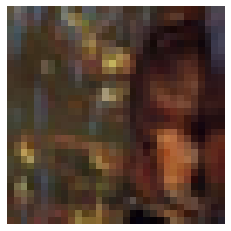

0


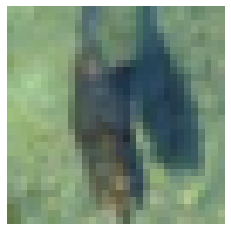

0


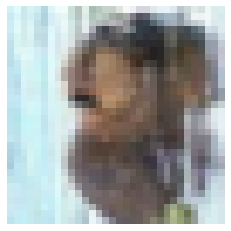

0


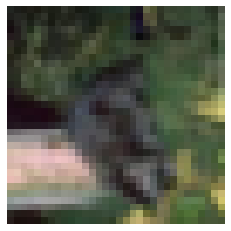

0


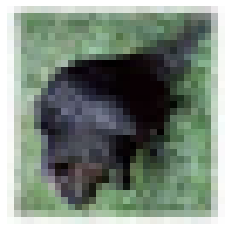

0


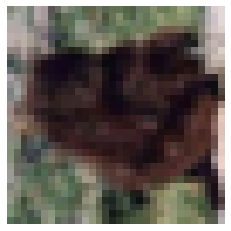

0


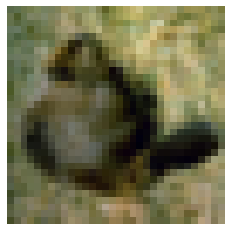

0


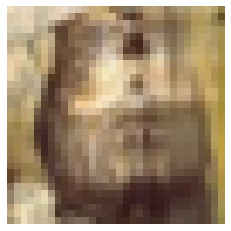

1


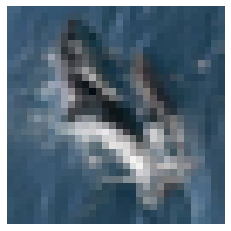

1


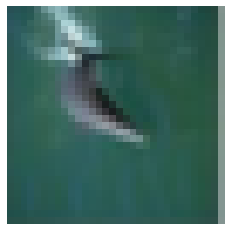

1


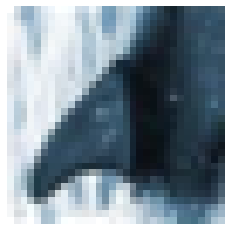

In [55]:
#figure = plt.figure()
for i in range(503):
    img, label = dataset_Realist[i]
    print(label)
    figure = plt.figure()
    plt.axis("off")
    plt.imshow(img.squeeze().T, cmap="gray")
    plt.show()
#print(label)

In [56]:
img_dict5 = {}
for i in range(num_classes5):
    img_dict5[classes5[i]] = 0
for i in range(dataset_size5):
    img, label = dataset_Realist[i]
    img_dict5[classes5[label]] += 1
img_dict5

{'beaver': 500,
 'dolphin': 296,
 'otter': 189,
 'seal': 131,
 'whale': 96,
 'aquarium_fish': 372,
 'flatfish': 209,
 'ray': 134,
 'shark': 93,
 'trout': 68,
 'orchid': 270,
 'poppy': 152,
 'rose': 97,
 'sunflower': 67,
 'tulip': 49,
 'bottle': 200,
 'bowl': 113,
 'can': 72,
 'cup': 50,
 'plate': 36,
 'apple': 152,
 'mushroom': 85,
 'orange': 54,
 'pear': 38,
 'sweet_pepper': 28,
 'clock': 117,
 'keyboard': 66,
 'lamp': 42,
 'telephone': 29,
 'television': 21,
 'bed': 92,
 'chair': 51,
 'couch': 33,
 'table': 23,
 'wardrobe': 16,
 'bee': 73,
 'beetle': 41,
 'butterfly': 26,
 'caterpillar': 18,
 'cockroach': 13,
 'bear': 59,
 'leopard': 33,
 'lion': 21,
 'tiger': 14,
 'wolf': 10,
 'bridge': 48,
 'castle': 27,
 'house': 17,
 'road': 12,
 'skyscraper': 8,
 'cloud': 39,
 'forest': 22,
 'mountain': 14,
 'plain': 9,
 'sea': 7,
 'camel': 32,
 'cattle': 18,
 'chimpanzee': 11,
 'elephant': 8,
 'kangaroo': 6,
 'fox': 27,
 'porcupine': 15,
 'possum': 9,
 'raccoon': 6,
 'skunk': 5,
 'crab': 23,
 '

In [91]:
Liste4 = list(img_dict5.values())
print(Liste4)

[500, 296, 189, 131, 96, 372, 209, 134, 93, 68, 270, 152, 97, 67, 49, 200, 113, 72, 50, 36, 152, 85, 54, 38, 28, 117, 66, 42, 29, 21, 92, 51, 33, 23, 16, 73, 41, 26, 18, 13, 59, 33, 21, 14, 10, 48, 27, 17, 12, 8, 39, 22, 14, 9, 7, 32, 18, 11, 8, 6, 27, 15, 9, 6, 5, 23, 13, 8, 5, 4, 19, 11, 7, 4, 3, 16, 9, 6, 4, 3, 14, 8, 5, 3, 2, 12, 7, 4, 3, 2, 10, 6, 3, 2, 2, 9, 5, 3, 2, 1]


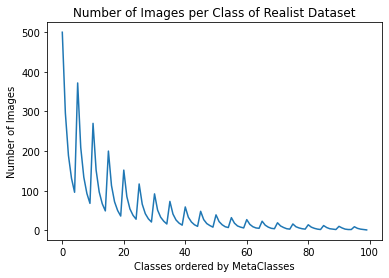

In [58]:
plt.figure()
plt.plot(Liste4)
plt.xlabel("Classes ordered by MetaClasses")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class of Realist Dataset")
plt.show()

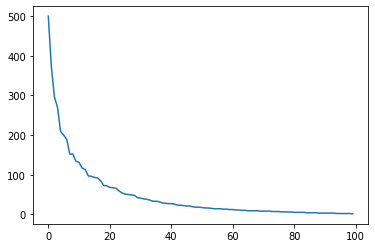

In [59]:
Liste4.sort(reverse=True)
plt.plot(Liste4)

In [60]:
dataset4 = CIFAR100Nils(
    root="./data",
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified


In [61]:
classes6 = dataset4.classes
num_classes6 = len(dataset4.classes)
dataset_size6 = len(dataset4)
print(dataset_size6)
print(num_classes6)
print(classes6)

50000
100
['beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium_fish', 'flatfish', 'ray', 'shark', 'trout', 'orchid', 'poppy', 'rose', 'sunflower', 'tulip', 'bottle', 'bowl', 'can', 'cup', 'plate', 'apple', 'mushroom', 'orange', 'pear', 'sweet_pepper', 'clock', 'keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 'bear', 'leopard', 'lion', 'tiger', 'wolf', 'bridge', 'castle', 'house', 'road', 'skyscraper', 'cloud', 'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 'crab', 'lobster', 'snail', 'spider', 'worm', 'baby', 'boy', 'girl', 'man', 'woman', 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 'maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree', 'bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train', 'lawn_mower', 'rocke

In [62]:
#figure = plt.figure()
#for i in range(dataset_size6):
#    img, label = dataset4[i]
#    print(label)
#plt.axis("off")
#plt.imshow(img.squeeze().T, cmap="gray")
#plt.show()
#print(label)

In [63]:
img_dict6 = {}
for i in range(num_classes6):
    img_dict6[classes6[i]] = 0
for i in range(dataset_size6):
    img, label = dataset4[i]
    img_dict6[classes6[label-1]] += 1
img_dict6

{'beaver': 500,
 'dolphin': 500,
 'otter': 500,
 'seal': 500,
 'whale': 500,
 'aquarium_fish': 500,
 'flatfish': 500,
 'ray': 500,
 'shark': 500,
 'trout': 500,
 'orchid': 500,
 'poppy': 500,
 'rose': 500,
 'sunflower': 500,
 'tulip': 500,
 'bottle': 500,
 'bowl': 500,
 'can': 500,
 'cup': 500,
 'plate': 500,
 'apple': 500,
 'mushroom': 500,
 'orange': 500,
 'pear': 500,
 'sweet_pepper': 500,
 'clock': 500,
 'keyboard': 500,
 'lamp': 500,
 'telephone': 500,
 'television': 500,
 'bed': 500,
 'chair': 500,
 'couch': 500,
 'table': 500,
 'wardrobe': 500,
 'bee': 500,
 'beetle': 500,
 'butterfly': 500,
 'caterpillar': 500,
 'cockroach': 500,
 'bear': 500,
 'leopard': 500,
 'lion': 500,
 'tiger': 500,
 'wolf': 500,
 'bridge': 500,
 'castle': 500,
 'house': 500,
 'road': 500,
 'skyscraper': 500,
 'cloud': 500,
 'forest': 500,
 'mountain': 500,
 'plain': 500,
 'sea': 500,
 'camel': 500,
 'cattle': 500,
 'chimpanzee': 500,
 'elephant': 500,
 'kangaroo': 500,
 'fox': 500,
 'porcupine': 500,
 'p

In [64]:
Liste5 = Liste4.copy()
Liste5.sort(reverse=True)

In [92]:
print(Liste5)

[500, 372, 296, 270, 209, 200, 189, 152, 152, 134, 131, 117, 113, 97, 96, 93, 92, 85, 73, 72, 68, 67, 66, 59, 54, 51, 50, 49, 48, 42, 41, 39, 38, 36, 33, 33, 32, 29, 28, 27, 27, 26, 23, 23, 22, 21, 21, 19, 18, 18, 17, 16, 16, 15, 14, 14, 14, 13, 13, 12, 12, 11, 11, 10, 10, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1]


In [65]:
#On veut maintenant construire nos datasets respectant différents critères, même nombre d'images, ils doivent suivre la même distribution selon les espèces, chaque classe doit avoir au moins une image
#Faisons quelquels test ici et puis on les fera au propre dans un autre notebook
#Commençons par créer un dataset échantillonné suivant les espèces
class GoodIMBALANCECIFAR10(torchvision.datasets.CIFAR10):
    cls_num = 10

    def __init__(self, root, imb_type='Good', imb_factor=2.3, imb_factor2=54.7, rand_number=0, train=True,
                 transform=None, target_transform=None,
                 download=False):
        super(GoodIMBALANCECIFAR10, self).__init__(root, train, transform, target_transform, download)
        np.random.seed(rand_number)
        img_num_list = self.get_img_num_per_cls(self.cls_num, imb_type, imb_factor, imb_factor2)
        self.gen_imbalanced_data(img_num_list)

    def get_img_num_per_cls(self, cls_num, imb_type, imb_factor, imb_factor2):
        img_max = len(self.data) / cls_num
        img_num_per_cls = []
        if imb_type == 'exp':
            for cls_idx in range(cls_num):
                num = img_max * (imb_factor**(cls_idx / (cls_num - 1.0)))
                img_num_per_cls.append(int(num))
        if imb_type == 'Good':
            for cls_idx in range(cls_num):
                num = Liste5[cls_idx]
                img_num_per_cls.append(int(num))
        if imb_type == 'Zipf-Mandelbrot':
            invC = 0
            for cls_idx in range(1, cls_num+1):
                invC += 1/((cls_idx+imb_factor2)**(imb_factor))
            for cls_idx in range(1, cls_num+1):
                num = img_max * (1/((cls_idx+imb_factor2)**(imb_factor)*invC))
                img_num_per_cls.append(int(num))
        if imb_type == 'Zipf':
            invC = 0
            for cls_idx in range(1, cls_num+1):
                invC += 1/((cls_idx)**(imb_factor))
            for cls_idx in range(1, cls_num+1):
                num = img_max * (1/((cls_idx)**(imb_factor)*invC))
                img_num_per_cls.append(int(num))
        elif imb_type == 'step':
            for cls_idx in range(cls_num // 2):
                img_num_per_cls.append(int(img_max))
            for cls_idx in range(cls_num // 2):
                img_num_per_cls.append(int(img_max * imb_factor))
        else:
            img_num_per_cls.extend([int(img_max)] * cls_num)
        return img_num_per_cls

    def gen_imbalanced_data(self, img_num_per_cls):
        new_data = []
        new_targets = []
        targets_np = np.array(self.targets, dtype=np.int64)
        classes = np.unique(targets_np)
        # np.random.shuffle(classes)
        self.num_per_cls_dict = dict()
        for the_class, the_img_num in zip(classes, img_num_per_cls):
            self.num_per_cls_dict[the_class] = the_img_num
            idx = np.where(targets_np == the_class)[0]
            np.random.shuffle(idx)
            selec_idx = idx[:the_img_num]
            new_data.append(self.data[selec_idx, ...])
            new_targets.extend([the_class, ] * the_img_num)
        new_data = np.vstack(new_data)
        self.data = new_data
        self.targets = new_targets
        
    def get_cls_num_list(self):
        cls_num_list = []
        for i in range(self.cls_num):
            cls_num_list.append(self.num_per_cls_dict[i])
        return cls_num_list

In [66]:
class GoodIMBALANCECIFAR100(GoodIMBALANCECIFAR10):
    """`CIFAR100 <https://www.cs.toronto.edu/~kriz/cifar.html>`_ Dataset.
    This is a subclass of the `CIFAR10` Dataset.
    """
    base_folder = 'cifar-100-python'
    url = "https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz"
    filename = "cifar-100-python.tar.gz"
    tgz_md5 = 'eb9058c3a382ffc7106e4002c42a8d85'
    train_list = [
        ['train', '16019d7e3df5f24257cddd939b257f8d'],
    ]

    test_list = [
        ['test', 'f0ef6b0ae62326f3e7ffdfab6717acfc'],
    ]
    meta = {
        'filename': 'meta',
        'key': 'fine_label_names',
        'md5': '7973b15100ade9c7d40fb424638fde48',
    }
    cls_num = 100


In [67]:
dataset_Species = GoodIMBALANCECIFAR100(root='./data', train=True,
                    download=True, transform=transform)

Files already downloaded and verified


In [68]:
dataset_Species

Dataset GoodIMBALANCECIFAR100
    Number of datapoints: 4927
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [69]:
classes7 = dataset_Species.classes
num_classes7 = len(dataset_Species.classes)
dataset_size7 = len(dataset_Species)
print(dataset_size7)
print(num_classes7)
print(classes7)

4927
100
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'will

In [70]:
#Vérification des labels
#for i in range(dataset_size7):
#    img, label = dataset_Species[i]
#    print(i)
#    figure = plt.figure()
#    plt.axis("off")
#    plt.imshow(img.squeeze().T, cmap="gray")
#    plt.show()


In [71]:
img_dict7 = {}
for i in range(num_classes7):
    img_dict7[classes7[i]] = 0
for i in range(dataset_size7):
    img, label = dataset_Species[i]
    img_dict7[classes7[label]] += 1
img_dict7

{'apple': 500,
 'aquarium_fish': 372,
 'baby': 296,
 'bear': 270,
 'beaver': 209,
 'bed': 200,
 'bee': 189,
 'beetle': 152,
 'bicycle': 152,
 'bottle': 134,
 'bowl': 131,
 'boy': 117,
 'bridge': 113,
 'bus': 97,
 'butterfly': 96,
 'camel': 93,
 'can': 92,
 'castle': 85,
 'caterpillar': 73,
 'cattle': 72,
 'chair': 68,
 'chimpanzee': 67,
 'clock': 66,
 'cloud': 59,
 'cockroach': 54,
 'couch': 51,
 'crab': 50,
 'crocodile': 49,
 'cup': 48,
 'dinosaur': 42,
 'dolphin': 41,
 'elephant': 39,
 'flatfish': 38,
 'forest': 36,
 'fox': 33,
 'girl': 33,
 'hamster': 32,
 'house': 29,
 'kangaroo': 28,
 'keyboard': 27,
 'lamp': 27,
 'lawn_mower': 26,
 'leopard': 23,
 'lion': 23,
 'lizard': 22,
 'lobster': 21,
 'man': 21,
 'maple_tree': 19,
 'motorcycle': 18,
 'mountain': 18,
 'mouse': 17,
 'mushroom': 16,
 'oak_tree': 16,
 'orange': 15,
 'orchid': 14,
 'otter': 14,
 'palm_tree': 14,
 'pear': 13,
 'pickup_truck': 13,
 'pine_tree': 12,
 'plain': 12,
 'plate': 11,
 'poppy': 11,
 'porcupine': 10,
 'poss

In [72]:
Liste7 = list(img_dict7.values())

Text(0.5, 1.0, 'Dataset sampled by Species')

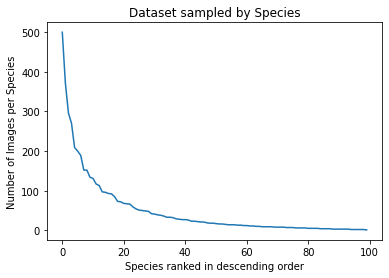

In [73]:
plt.plot(Liste7)
plt.xlabel("Species ranked in descending order")
plt.ylabel("Number of Images per Species")
plt.title("Dataset sampled by Species")

In [74]:
#Echantillonons au niveau des genres
class IMBALANCECIFAR100Generas(CIFAR100Nils):
    cls_num = 100

    def __init__(self, root, imb_type='Generas', a1=4, q1=10, a2 = 2, q2=2, rand_number=0, train=True,
                 transform=None, target_transform=None,
                 download=False):
        super(IMBALANCECIFAR100Generas, self).__init__(root, train, transform, target_transform, download)
        np.random.seed(rand_number)
        img_num_list = self.get_img_num_per_cls(self.cls_num, imb_type, a1, q1, a2, q2)
        self.gen_imbalanced_data(img_num_list)

    def get_img_num_per_cls(self, cls_num, imb_type, a1, q1, a2, q2):
        img_max = len(self.data) / cls_num
        img_num_per_cls = []
        if imb_type == 'exp':
            for cls_idx in range(cls_num):
                num = img_max * (imb_factor**(cls_idx / (cls_num - 1.0)))
                img_num_per_cls.append(int(num))
        if imb_type == 'Generas':
            for cls_idx in range(cls_num):
                num = Liste5[cls_idx]
                img_num_per_cls.append(int(num))
        if imb_type == 'ZM':
            Normalisation = 0
            for i in range(1, 21): #Les genres
                Int = []
                for j in range(1, 6): #les especes
                    Normalisation += (1/(i+q1)**(a1))*(1/(j+q2)**(a2))
            for cls_idx in range(cls_num):
                cls_genre = cls_idx % 5 + 1
                cls_espece = cls_idx // 5 + 1
                num = (1/(cls_espece+q1)**(a1))*(1/(cls_genre+q2)**(a2))
                img_num_per_cls.append(min(int(num*5000/Normalisation), 500))
        if imb_type == 'Zipf-Mandelbrot':
            invC = 0
            for cls_idx in range(1, cls_num+1):
                invC += 1/((cls_idx+imb_factor2)**(imb_factor))
            for cls_idx in range(1, cls_num+1):
                num = img_max * (1/((cls_idx+imb_factor2)**(imb_factor)*invC))
                img_num_per_cls.append(int(num))
        if imb_type == 'Zipf':
            invC = 0
            for cls_idx in range(1, cls_num+1):
                invC += 1/((cls_idx)**(imb_factor))
            for cls_idx in range(1, cls_num+1):
                num = img_max * (1/((cls_idx)**(imb_factor)*invC))
                img_num_per_cls.append(int(num))
        elif imb_type == 'step':
            for cls_idx in range(cls_num // 2):
                img_num_per_cls.append(int(img_max))
            for cls_idx in range(cls_num // 2):
                img_num_per_cls.append(int(img_max * imb_factor))
        else:
            img_num_per_cls.extend([int(img_max)] * cls_num)
        return img_num_per_cls

    def gen_imbalanced_data(self, img_num_per_cls):
        new_data = []
        new_targets = []
        targets_np = np.array(self.targets, dtype=np.int64)
        classes = np.unique(targets_np)
        # np.random.shuffle(classes)
        self.num_per_cls_dict = dict()
        for the_class, the_img_num in zip(classes, img_num_per_cls):
            self.num_per_cls_dict[the_class] = the_img_num
            idx = np.where(targets_np == the_class)[0]
            np.random.shuffle(idx)
            selec_idx = idx[:the_img_num]
            new_data.append(self.data[selec_idx, ...])
            new_targets.extend([the_class, ] * the_img_num)
        new_data = np.vstack(new_data)
        self.data = new_data
        self.targets = new_targets
        
    def get_cls_num_list(self):
        cls_num_list = []
        for i in range(self.cls_num):
            cls_num_list.append(self.num_per_cls_dict[i])
        return cls_num_list

In [75]:
dataset_Generas = IMBALANCECIFAR100Generas(
    root="./data",
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified


In [76]:
classes8 = dataset_Generas.classes
num_classes8 = len(dataset_Generas.classes)
dataset_size8 = len(dataset_Generas)
print(dataset_size8)
print(num_classes8)
print(classes8)

4927
100
['beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium_fish', 'flatfish', 'ray', 'shark', 'trout', 'orchid', 'poppy', 'rose', 'sunflower', 'tulip', 'bottle', 'bowl', 'can', 'cup', 'plate', 'apple', 'mushroom', 'orange', 'pear', 'sweet_pepper', 'clock', 'keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 'bear', 'leopard', 'lion', 'tiger', 'wolf', 'bridge', 'castle', 'house', 'road', 'skyscraper', 'cloud', 'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 'crab', 'lobster', 'snail', 'spider', 'worm', 'baby', 'boy', 'girl', 'man', 'woman', 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 'maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree', 'bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train', 'lawn_mower', 'rocket

In [77]:
#Vérification des labels
#for i in range(dataset_size8):
#    img, label = dataset_Generas[i]
#    print(i)
#    figure = plt.figure()
#    plt.axis("off")
#    plt.imshow(img.squeeze().T, cmap="gray")
#    plt.show()


In [78]:
img_dict8 = {}
for i in range(num_classes8):
    img_dict8[classes8[i]] = 0
for i in range(dataset_size8):
    img, label = dataset_Generas[i]
    img_dict8[classes8[label]] += 1
img_dict8

{'beaver': 500,
 'dolphin': 372,
 'otter': 296,
 'seal': 270,
 'whale': 209,
 'aquarium_fish': 200,
 'flatfish': 189,
 'ray': 152,
 'shark': 152,
 'trout': 134,
 'orchid': 131,
 'poppy': 117,
 'rose': 113,
 'sunflower': 97,
 'tulip': 96,
 'bottle': 93,
 'bowl': 92,
 'can': 85,
 'cup': 73,
 'plate': 72,
 'apple': 68,
 'mushroom': 67,
 'orange': 66,
 'pear': 59,
 'sweet_pepper': 54,
 'clock': 51,
 'keyboard': 50,
 'lamp': 49,
 'telephone': 48,
 'television': 42,
 'bed': 41,
 'chair': 39,
 'couch': 38,
 'table': 36,
 'wardrobe': 33,
 'bee': 33,
 'beetle': 32,
 'butterfly': 29,
 'caterpillar': 28,
 'cockroach': 27,
 'bear': 27,
 'leopard': 26,
 'lion': 23,
 'tiger': 23,
 'wolf': 22,
 'bridge': 21,
 'castle': 21,
 'house': 19,
 'road': 18,
 'skyscraper': 18,
 'cloud': 17,
 'forest': 16,
 'mountain': 16,
 'plain': 15,
 'sea': 14,
 'camel': 14,
 'cattle': 14,
 'chimpanzee': 13,
 'elephant': 13,
 'kangaroo': 12,
 'fox': 12,
 'porcupine': 11,
 'possum': 11,
 'raccoon': 10,
 'skunk': 10,
 'crab'

In [79]:
Liste8 = list(img_dict8.values())

In [97]:
from collections import OrderedDict
img_dict8_ordered = OrderedDict(sorted(img_dict8.items()))
img_dict8_ordered

OrderedDict([('apple', 68),
             ('aquarium_fish', 200),
             ('baby', 8),
             ('bear', 27),
             ('beaver', 500),
             ('bed', 41),
             ('bee', 33),
             ('beetle', 32),
             ('bicycle', 3),
             ('bottle', 93),
             ('bowl', 92),
             ('boy', 8),
             ('bridge', 21),
             ('bus', 3),
             ('butterfly', 29),
             ('camel', 14),
             ('can', 85),
             ('castle', 21),
             ('caterpillar', 28),
             ('cattle', 14),
             ('chair', 39),
             ('chimpanzee', 13),
             ('clock', 51),
             ('cloud', 17),
             ('cockroach', 27),
             ('couch', 38),
             ('crab', 9),
             ('crocodile', 7),
             ('cup', 73),
             ('dinosaur', 6),
             ('dolphin', 372),
             ('elephant', 13),
             ('flatfish', 189),
             ('forest', 16),
             ('f

In [100]:
New_List = list(img_dict8_ordered.values())
New_List

[68,
 200,
 8,
 27,
 500,
 41,
 33,
 32,
 3,
 93,
 92,
 8,
 21,
 3,
 29,
 14,
 85,
 21,
 28,
 14,
 39,
 13,
 51,
 17,
 27,
 38,
 9,
 7,
 73,
 6,
 372,
 13,
 189,
 16,
 12,
 8,
 5,
 19,
 12,
 50,
 49,
 2,
 26,
 23,
 6,
 9,
 7,
 4,
 3,
 16,
 5,
 67,
 4,
 66,
 131,
 296,
 4,
 59,
 3,
 3,
 15,
 72,
 117,
 11,
 11,
 5,
 10,
 152,
 18,
 2,
 113,
 14,
 270,
 152,
 5,
 10,
 18,
 9,
 6,
 9,
 4,
 2,
 97,
 54,
 36,
 2,
 48,
 42,
 23,
 1,
 2,
 134,
 96,
 6,
 33,
 209,
 3,
 22,
 7,
 8]

Text(0.5, 1.0, 'Dataset sampled by Generas')

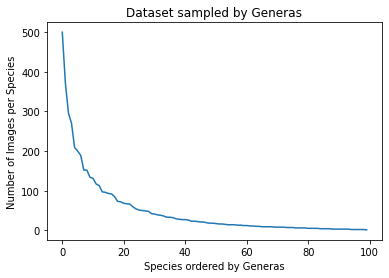

In [80]:
plt.plot(Liste8)
plt.xlabel("Species ordered by Generas")
plt.ylabel("Number of Images per Species")
plt.title("Dataset sampled by Generas")

In [81]:
#Et un dataset où les especes sont complétement random
#On veut maintenant construire nos datasets respectant différents critères, même nombre d'images, ils doivent suivre la même distribution selon les espèces, chaque classe doit avoir au moins une image
#Faisons quelquels test ici et puis on les fera au propre dans un autre notebook
#Commençons par créer un dataset échantillonné suivant les espèces
import random
Sample = random.sample(Liste4, k=len(Liste4))
class RandomIMBALANCECIFAR10(torchvision.datasets.CIFAR10):
    cls_num = 10

    def __init__(self, root, imb_type='Good', imb_factor=2.3, imb_factor2=54.7, rand_number=0, train=True,
                 transform=None, target_transform=None,
                 download=False):
        super(RandomIMBALANCECIFAR10, self).__init__(root, train, transform, target_transform, download)
        np.random.seed(rand_number)
        img_num_list = self.get_img_num_per_cls(self.cls_num, imb_type, imb_factor, imb_factor2)
        self.gen_imbalanced_data(img_num_list)

    def get_img_num_per_cls(self, cls_num, imb_type, imb_factor, imb_factor2):
        img_max = len(self.data) / cls_num
        img_num_per_cls = []
        if imb_type == 'exp':
            for cls_idx in range(cls_num):
                num = img_max * (imb_factor**(cls_idx / (cls_num - 1.0)))
                img_num_per_cls.append(int(num))
        if imb_type == 'Good':
            for cls_idx in range(cls_num):
                num = Sample[cls_idx]
                img_num_per_cls.append(int(num))
        if imb_type == 'Zipf-Mandelbrot':
            invC = 0
            for cls_idx in range(1, cls_num+1):
                invC += 1/((cls_idx+imb_factor2)**(imb_factor))
            for cls_idx in range(1, cls_num+1):
                num = img_max * (1/((cls_idx+imb_factor2)**(imb_factor)*invC))
                img_num_per_cls.append(int(num))
        if imb_type == 'Zipf':
            invC = 0
            for cls_idx in range(1, cls_num+1):
                invC += 1/((cls_idx)**(imb_factor))
            for cls_idx in range(1, cls_num+1):
                num = img_max * (1/((cls_idx)**(imb_factor)*invC))
                img_num_per_cls.append(int(num))
        elif imb_type == 'step':
            for cls_idx in range(cls_num // 2):
                img_num_per_cls.append(int(img_max))
            for cls_idx in range(cls_num // 2):
                img_num_per_cls.append(int(img_max * imb_factor))
        else:
            img_num_per_cls.extend([int(img_max)] * cls_num)
        return img_num_per_cls

    def gen_imbalanced_data(self, img_num_per_cls):
        new_data = []
        new_targets = []
        targets_np = np.array(self.targets, dtype=np.int64)
        classes = np.unique(targets_np)
        # np.random.shuffle(classes)
        self.num_per_cls_dict = dict()
        for the_class, the_img_num in zip(classes, img_num_per_cls):
            self.num_per_cls_dict[the_class] = the_img_num
            idx = np.where(targets_np == the_class)[0]
            np.random.shuffle(idx)
            selec_idx = idx[:the_img_num]
            new_data.append(self.data[selec_idx, ...])
            new_targets.extend([the_class, ] * the_img_num)
        new_data = np.vstack(new_data)
        self.data = new_data
        self.targets = new_targets
        
    def get_cls_num_list(self):
        cls_num_list = []
        for i in range(self.cls_num):
            cls_num_list.append(self.num_per_cls_dict[i])
        return cls_num_list

In [82]:
class RandomIMBALANCECIFAR100(RandomIMBALANCECIFAR10):
    """`CIFAR100 <https://www.cs.toronto.edu/~kriz/cifar.html>`_ Dataset.
    This is a subclass of the `CIFAR10` Dataset.
    """
    base_folder = 'cifar-100-python'
    url = "https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz"
    filename = "cifar-100-python.tar.gz"
    tgz_md5 = 'eb9058c3a382ffc7106e4002c42a8d85'
    train_list = [
        ['train', '16019d7e3df5f24257cddd939b257f8d'],
    ]

    test_list = [
        ['test', 'f0ef6b0ae62326f3e7ffdfab6717acfc'],
    ]
    meta = {
        'filename': 'meta',
        'key': 'fine_label_names',
        'md5': '7973b15100ade9c7d40fb424638fde48',
    }
    cls_num = 100


In [83]:
dataset_Species_Random = RandomIMBALANCECIFAR100(root='./data', train=True,
                    download=True, transform=transform)

Files already downloaded and verified


In [84]:
classes9 = dataset_Species_Random.classes
num_classes9 = len(dataset_Species_Random.classes)
dataset_size9 = len(dataset_Species_Random)
print(dataset_size9)
print(num_classes9)
print(classes9)

4927
100
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'will

In [85]:
img_dict9 = {}
for i in range(num_classes9):
    img_dict9[classes9[i]] = 0
for i in range(dataset_size9):
    img, label = dataset_Species_Random[i]
    img_dict9[classes9[label]] += 1
img_dict9

{'apple': 4,
 'aquarium_fish': 5,
 'baby': 14,
 'bear': 4,
 'beaver': 67,
 'bed': 209,
 'bee': 131,
 'beetle': 50,
 'bicycle': 113,
 'bottle': 72,
 'bowl': 93,
 'boy': 38,
 'bridge': 2,
 'bus': 3,
 'butterfly': 12,
 'camel': 13,
 'can': 152,
 'castle': 16,
 'caterpillar': 11,
 'cattle': 21,
 'chair': 8,
 'chimpanzee': 3,
 'clock': 3,
 'cloud': 3,
 'cockroach': 23,
 'couch': 8,
 'crab': 14,
 'crocodile': 5,
 'cup': 27,
 'dinosaur': 372,
 'dolphin': 66,
 'elephant': 21,
 'flatfish': 9,
 'forest': 10,
 'fox': 54,
 'girl': 22,
 'hamster': 18,
 'house': 32,
 'kangaroo': 270,
 'keyboard': 73,
 'lamp': 9,
 'lawn_mower': 59,
 'leopard': 1,
 'lion': 8,
 'lizard': 19,
 'lobster': 296,
 'man': 16,
 'maple_tree': 117,
 'motorcycle': 27,
 'mountain': 7,
 'mouse': 4,
 'mushroom': 33,
 'oak_tree': 3,
 'orange': 48,
 'orchid': 6,
 'otter': 2,
 'palm_tree': 500,
 'pear': 18,
 'pickup_truck': 5,
 'pine_tree': 9,
 'plain': 13,
 'plate': 42,
 'poppy': 51,
 'porcupine': 4,
 'possum': 152,
 'rabbit': 2,
 'r

In [86]:
Liste9 = list(img_dict9.values())
Liste9.sort(reverse=True)

Text(0.5, 1.0, 'Dataset with Species distributed randomly')

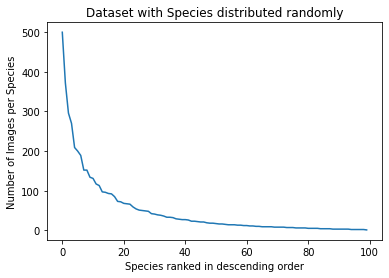

In [87]:
plt.plot(Liste9)
plt.xlabel("Species ranked in descending order")
plt.ylabel("Number of Images per Species")
plt.title("Dataset with Species distributed randomly")

In [88]:
dataset_Species.classes

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [89]:
#Training a Classifier
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainloader = torch.utils.data.DataLoader(dataset_Species, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
train_dataset_Species = GoodIMBALANCECIFAR100(root='./data', train=False,
                    download=True, transform=transform)
testloader = torch.utils.data.DataLoader(train_dataset_Species, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tiger',
 'tractor',
 'train',
 'trout',
 'tulip',
 'turtle',
 'wardrobe',
 'whale',
 'willow_tree',
 'wolf',
 'woman',
 'worm')


Files already downloaded and verified


In [90]:
#Show some of the training images
import matplotlib.pyplot as plt
import numpy as np
